## Predicting Energy consumption in NYC

A Data-Driven Approach to Sustainable Urban Living"

Datasets: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data / https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page


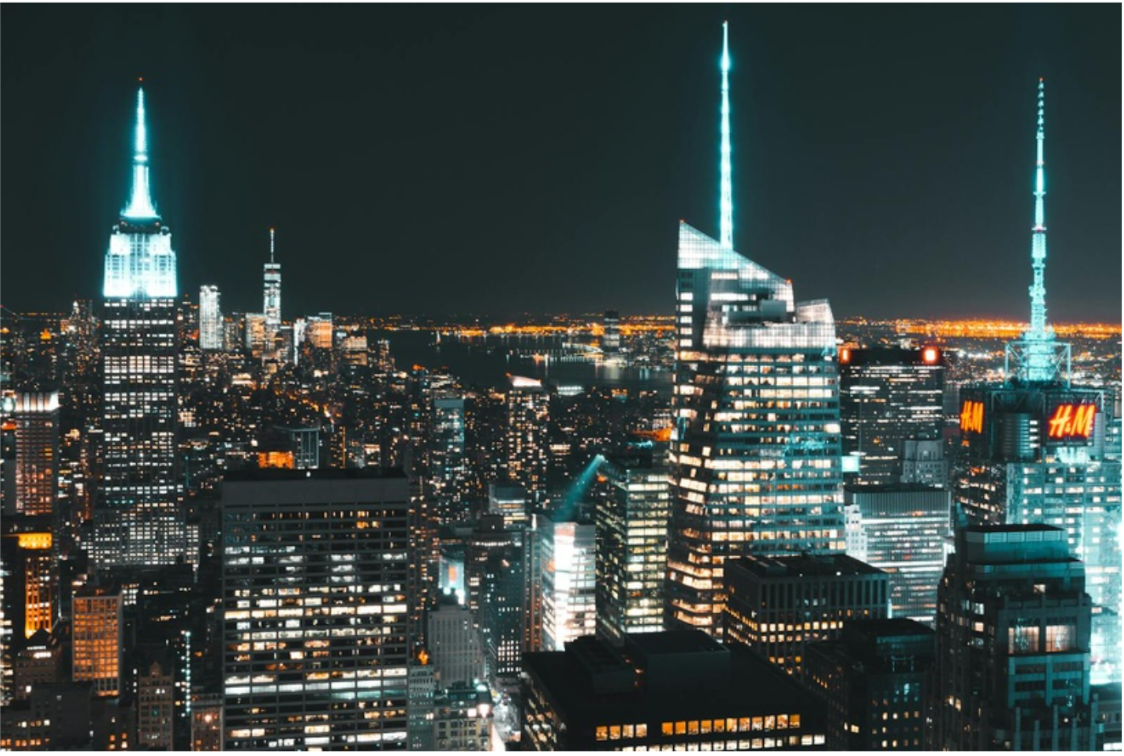

## Business Understanding:
This project centers on the analysis and prediction of energy consumption in buildings across New York City, with a focus on driving positive outcomes for various stakeholders. The intended audience includes urban planners, environmentalists, the New York State Government, real estate investors, and policymakers. The goal is to provide insights that can influence energy-efficient building practices, shape policies supporting sustainable living, and contribute to cost savings for individuals and businesses. By predicting energy efficiency trends, the project aims to guide strategic decisions that not only optimize resource usage and reduce environmental impact but also support economic development and enhance the overall resilience of the community


## Data Understanding

This project leverages two key datasets: The NYC Building Energy for Local Law 84 (2023-Present), providing information on energy usage for buildings exceeding 50,000 square feet, including details such as year built, address, and occupancy. Additionally, the Primary Land Use Tax Lot Output (PLUTO™) data file offers comprehensive land use and geographic data, featuring columns like address, number of buildings, number of floors, etc. The selection of these datasets are based on their extensive information content, with PLUTO™ comprising over 800,000 rows and 92 columns, and the NYC dataset containing 30,000 rows and 254 columns. Directly sourced from official websites, these datasets encompass diverse features, including building energy consumption, water usage, land use, zoning, building characteristics, and geographic information. Our study stands out for its unique approach to integrating these datasets, potentially offering valuable insights into the field of urban energy efficiency analysis.


In [183]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score,make_scorer, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor

import scipy.stats as stats


from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt



# Part 1

## Data exploration

* Pluto datas

In [52]:
#Reading The Primary Land Use Tax Lot Output (PLUTO™) dataset
df1=pd.read_csv('data/pluto_23v3_1.csv')

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_7775/732255290.py:2: DtypeWarning: Columns (21,22,24,25,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('data/pluto_23v3_1.csv')


In [53]:
#checkiing the shape()
df1.shape

(858598, 92)

In [54]:
#checking the first 5 rows
df1.head()

borough  block  lot     cd    bct2020     bctcb2020  ct2010  cb2010  \
0      BX   5595   94  210.0  2013200.0  2.013201e+10   132.0  5008.0   
1      BX   5593   98  210.0  2013200.0  2.013201e+10   132.0  5006.0   
2      BX   5593  106  210.0  2013200.0  2.013201e+10   132.0  5006.0   
3      BX   5593  103  210.0  2013200.0  2.013201e+10   132.0  5006.0   
4      BX   5593  101  210.0  2013200.0  2.013201e+10   132.0  5006.0   

   schooldist  council  ...  appbbl appdate  plutomapid  firm07_flag  \
0         8.0     13.0  ...     NaN     NaN           1          NaN   
1         8.0     13.0  ...     NaN     NaN           1          NaN   
2         8.0     13.0  ...     NaN     NaN           1          NaN   
3         8.0     13.0  ...     NaN     NaN           1          1.0   
4         8.0     13.0  ...     NaN     NaN           1          1.0   

   pfirm15_flag  version  dcpedited   latitude  longitude notes  
0           NaN   23v3.1        NaN  40.814154 -73.820936   NaN  
1           1.0   23v3.1        NaN  40.814429 -73.819393   NaN  
2           1.0   23v3.1        NaN  40.814896 -73.819695   NaN  
3           1.0   23v3.1        NaN  40.814706 -73.819580   NaN  
4           1.0   23v3.1        NaN  40.814577 -73.819504   NaN  

[5 rows x 92 columns]

In [55]:
#checking the columns info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858598 entries, 0 to 858597
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               858598 non-null  object 
 1   block                 858598 non-null  int64  
 2   lot                   858598 non-null  int64  
 3   cd                    857655 non-null  float64
 4   bct2020               857601 non-null  float64
 5   bctcb2020             857601 non-null  float64
 6   ct2010                857601 non-null  float64
 7   cb2010                857601 non-null  float64
 8   schooldist            856929 non-null  float64
 9   council               857513 non-null  float64
 10  zipcode               856914 non-null  float64
 11  firecomp              856910 non-null  object 
 12  policeprct            856924 non-null  float64
 13  healthcenterdistrict  856924 non-null  float64
 14  healtharea            856924 non-null  float64
 15  

In [56]:
#Convert the data set into lower case
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# Convert column names to lowercase
df1.columns = [col.lower() for col in df1.columns]

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_7775/2155551730.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [57]:
df1.isna().sum()

borough           0
block             0
lot               0
cd              943
bct2020         997
              ...  
version           0
dcpedited    816447
latitude       1049
longitude      1049
notes        858598
Length: 92, dtype: int64

In [58]:
# Exploring the address column
df1['address'].value_counts()

address
500 west 18th street    203
 hylan boulevard        167
 arthur kill road       154
 amboy road             153
 richmond terrace       144
                       ... 
261 west 113 street       1
253 west 113 street       1
227 west 113 street       1
267 west 113 street       1
342 amsterdam avenue      1
Name: count, Length: 828131, dtype: int64

## Reading df2

In [59]:
#reading NYC Building energy
df2=pd.read_csv('data/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240129.csv')

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_7775/3123082929.py:2: DtypeWarning: Columns (10,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('data/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240129.csv')


In [60]:
#checking the shape
df2.shape

(30485, 254)

In [61]:
#Reading df2.info()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display DataFrame information in a structured format
print(f"<class 'pandas.core.frame.DataFrame'>")
print(f"RangeIndex: {df2.shape[0]} entries, 0 to {df2.shape[0] - 1}")
print("Data columns (total %d columns):" % df2.shape[1])

# Loop through columns and display information for each
for i, column in enumerate(df2.columns):
    print(f" #   {i:2d} {column:20s} {df2[column].count():>13d} non-null  {df2[column].dtype.name:<8s}")

# Display memory usage information
print(f"dtypes: {df2.dtypes.value_counts().to_string()}")
print(f"memory usage: {df2.memory_usage(deep=True).sum() / (1024**2):.1f}+ MB")

# Reset display options to default values
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Data columns (total 254 columns):
 #    0 Report Year                  30485 non-null  int64   
 #    1 Property ID                  30485 non-null  int64   
 #    2 Property Name                30485 non-null  object  
 #    3 Parent Property ID           30485 non-null  object  
 #    4 Parent Property Name         30485 non-null  object  
 #    5 Year Ending                  30485 non-null  object  
 #    6 NYC Borough, Block and Lot (BBL)         30485 non-null  object  
 #    7 NYC Building Identification Number (BIN)         30485 non-null  object  
 #    8 Address 1                    30485 non-null  object  
 #    9 City                         30485 non-null  object  
 #   10 Postal Code                  30485 non-null  object  
 #   11 Primary Property Type - Self Selected         30485 non-null  object  
 #   12 Primary Property Type - Portfolio Manager-Calculated         30485 non-null  object  
 # 

In [62]:
df2.head()

Report Year  Property ID              Property Name  \
0         2022      6414946         58-01 Grand Avenue   
1         2022      9793770  1870 Pelham Parkway South   
2         2022     10177418           Central Building   
3         2022     13511507       215 East 99th Street   
4         2022     14009907            23-25 31 Street   

                    Parent Property ID                 Parent Property Name  \
0  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
1  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
2  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
3  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
4  Not Applicable: Standalone Property  Not Applicable: Standalone Property   

  Year Ending NYC Borough, Block and Lot (BBL)  \
0  12/31/2022                       4026780001   
1  12/31/2022                       2042500026   
2  12/31/2022                       4157040040   
3  12/31/2022                       1016490009   
4  12/31/2022                       4008350027   

  NYC Building Identification Number (BIN)                  Address 1  \
0                                  4059918         58-01 Grand Avenue   
1                                  2047795  1870 Pelham Parkway South   
2                                  4300145              2011 Mott Ave   
3                                  1052383       215 East 99th Street   
4                                  4017180            23-25 31 Street   

           City  ... Number of Active IT Meters  Report Generation Date  \
0        Queens  ...                          0  04/25/2023 11:01:44 AM   
1         Bronx  ...                          0  03/11/2023 02:00:50 PM   
2  Far Rockaway  ...                          0  04/14/2023 03:47:19 PM   
3      New York  ...                          0  03/12/2023 03:54:23 PM   
4        Queens  ...                          0  04/28/2023 02:22:48 PM   

   Report Submission Date    Borough   Latitude  Longitude  Community Board  \
0  04/25/2023 11:02:08 AM     QUEENS  40.719667 -73.911197            405.0   
1  03/11/2023 02:01:08 PM      BRONX  40.855488 -73.830726            210.0   
2  04/14/2023 03:47:37 PM     QUEENS  40.604320 -73.753009            414.0   
3  03/12/2023 03:54:43 PM  MANHATTAN  40.786963 -73.947537            111.0   
4  04/28/2023 02:23:30 PM     QUEENS  40.773768 -73.913573            401.0   

  Council District Census Tract (2020)  \
0             30.0               531.0   
1             13.0               300.0   
2             31.0            100803.0   
3              8.0               164.0   
4             22.0               115.0   

  Neighborhood Tabulation Area (NTA) (2020)  
0                                    QN0501  
1                                    BX1003  
2                                    QN1401  
3                                    MN1101  
4                                    QN0101  

[5 rows x 254 columns]

In [63]:
# Convert column names to lowercase
df2.columns = [col.lower() for col in df2.columns]

#Convert the data set into lower case
df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df2.head()

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_7775/1536913436.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)


report year  property id              property name  \
0         2022      6414946         58-01 grand avenue   
1         2022      9793770  1870 pelham parkway south   
2         2022     10177418           central building   
3         2022     13511507       215 east 99th street   
4         2022     14009907            23-25 31 street   

                    parent property id                 parent property name  \
0  not applicable: standalone property  not applicable: standalone property   
1  not applicable: standalone property  not applicable: standalone property   
2  not applicable: standalone property  not applicable: standalone property   
3  not applicable: standalone property  not applicable: standalone property   
4  not applicable: standalone property  not applicable: standalone property   

  year ending nyc borough, block and lot (bbl)  \
0  12/31/2022                       4026780001   
1  12/31/2022                       2042500026   
2  12/31/2022                       4157040040   
3  12/31/2022                       1016490009   
4  12/31/2022                       4008350027   

  nyc building identification number (bin)                  address 1  \
0                                  4059918         58-01 grand avenue   
1                                  2047795  1870 pelham parkway south   
2                                  4300145              2011 mott ave   
3                                  1052383       215 east 99th street   
4                                  4017180            23-25 31 street   

           city  ... number of active it meters  report generation date  \
0        queens  ...                          0  04/25/2023 11:01:44 am   
1         bronx  ...                          0  03/11/2023 02:00:50 pm   
2  far rockaway  ...                          0  04/14/2023 03:47:19 pm   
3      new york  ...                          0  03/12/2023 03:54:23 pm   
4        queens  ...                          0  04/28/2023 02:22:48 pm   

   report submission date    borough   latitude  longitude  community board  \
0  04/25/2023 11:02:08 am     queens  40.719667 -73.911197            405.0   
1  03/11/2023 02:01:08 pm      bronx  40.855488 -73.830726            210.0   
2  04/14/2023 03:47:37 pm     queens  40.604320 -73.753009            414.0   
3  03/12/2023 03:54:43 pm  manhattan  40.786963 -73.947537            111.0   
4  04/28/2023 02:23:30 pm     queens  40.773768 -73.913573            401.0   

  council district census tract (2020)  \
0             30.0               531.0   
1             13.0               300.0   
2             31.0            100803.0   
3              8.0               164.0   
4             22.0               115.0   

  neighborhood tabulation area (nta) (2020)  
0                                    qn0501  
1                                    bx1003  
2                                    qn1401  
3                                    mn1101  
4                                    qn0101  

[5 rows x 254 columns]

## Merging using address columns in both datasets

In [64]:
df1[['address']]

address
0         2737 schurz avenue
1       182 brinsmade avenue
2       196 brinsmade avenue
3       190 brinsmade avenue
4       186 brinsmade avenue
...                      ...
858593      18 kissam avenue
858594         jewett avenue
858595     40 holcomb avenue
858596      holden boulevard
858597  342 amsterdam avenue

[858598 rows x 1 columns]

In [65]:
# Manual Cleaning of df1 address
df1['address'] = df1['address'].str.replace('-', '')  # Remove '-'
df1['address'] = df1['address'].str.split('/').str[0].str.strip() # Remove '/'

In [66]:
#exploring df2 address column
df2[['address 1','postal code']]

address 1 postal code
0             58-01 grand avenue       11378
1      1870 pelham parkway south       10461
2                  2011 mott ave       11691
3           215 east 99th street       10029
4                23-25 31 street       11105
...                          ...         ...
30480           163 front street       10038
30481            15 lisbon place       10306
30482              113-25 14 ave       11356
30483             450 zerega ave       10473
30484       347-349 rider avenue       10451

[30485 rows x 2 columns]

In [67]:
# Manual Cleaning of df2 address
df2['address 1'] = df2['address 1'].str.replace('-', '')  # Remove '-'
df2['address 1'] = df2['address 1'].str.split('/').str[0].str.strip()  # Remove '/'

In [68]:
#Merging both datasets
df_m2 = pd.merge(df2, df1, left_on='address 1', right_on='address')
df_m2.shape

(9723, 346)

In [69]:
#Merging both datasets
df_m = pd.merge(df1, df2, left_on='address', right_on='address 1')
df_m.shape

(9723, 346)

In [70]:
#Exporting our dataset into a csv file
df_m.to_csv('df_a_m.csv', index=False)

# Part 2

## EDA

In [71]:
import pandas as pd
#reading the merged dataset
df_a_m = pd.read_csv('df_a_m.csv', low_memory=False);

In [72]:
#checking the shape
df_a_m.shape 

(9723, 346)

In [73]:
# checking the information of the columns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display DataFrame information in a structured format
print(f"<class 'pandas.core.frame.DataFrame'>")
print(f"RangeIndex: {df_a_m.shape[0]} entries, 0 to {df_a_m.shape[0] - 1}")
print("Data columns (total %d columns):" % df_a_m.shape[1])

# Loop through columns and display information for each
for i, column in enumerate(df_a_m.columns):
    print(f" #   {i:2d} {column:20s} {df_a_m[column].count():>13d} non-null  {df_a_m[column].dtype.name:<8s}")

# Display memory usage information
print(f"dtypes: {df_a_m.dtypes.value_counts().to_string()}")
print(f"memory usage: {df_a_m.memory_usage(deep=True).sum() / (1024**2):.1f}+ MB")

# Reset display options to default values
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 346 columns):
 #    0 borough_x                     9723 non-null  object  
 #    1 block                         9723 non-null  int64   
 #    2 lot                           9723 non-null  int64   
 #    3 cd                            9689 non-null  float64 
 #    4 bct2020                       9689 non-null  float64 
 #    5 bctcb2020                     9689 non-null  float64 
 #    6 ct2010                        9689 non-null  float64 
 #    7 cb2010                        9689 non-null  float64 
 #    8 schooldist                    9620 non-null  float64 
 #    9 council                       9679 non-null  float64 
 #   10 zipcode                       9620 non-null  float64 
 #   11 firecomp                      9620 non-null  object  
 #   12 policeprct                    9620 non-null  float64 
 #   13 healthcenterdistrict          9620 non-null  float64 
 #   14 healtharea      

In [74]:
#checking for duplicates in property id
df_a_m['property id'].duplicated().value_counts()

property id
False    9212
True      511
Name: count, dtype: int64

In [75]:
#Dropping for duplicates in property id
df_a_m = df_a_m.drop_duplicates(subset='property id')

In [76]:
#Sanity check 
df_a_m.shape 

(9212, 346)

In [77]:
#Reviewing the duplicates
df_a_m.duplicated().value_counts()

False    9212
Name: count, dtype: int64

In [78]:
# Normalize the 'postal code' column to the first 5 characters ( from values '10012-4411')
df_a_m['postal code'] = df_a_m['postal code'].str[:5]

# Verify the update
df_a_m['postal code'].unique()

array(['10461', '11101', '11106', '11102', '10025', '11205', '10011',
       '10010', '11418', '11215', '10001', '11103', '11104', '11211',
       '11377', '11435', '11434', '11433', '11232', '10027', '10016',
       '10017', '10006', '10024', '10455', '11228', '10463', '11209',
       '11217', '11218', '10018', '11238', '11432', '11368', '11373',
       '11423', '10475', '10028', '10023', '11229', '10022', '10456',
       '10301', '11374', '11365', '11436', '11355', '11354', '11427',
       '11249', '10034', '10014', '10013', '10002', '10012', '10004',
       '10003', '10459', '10470', '10309', '10038', '11201', '11237',
       '10453', '11235', '10040', '11109', '10452', '10473', '10036',
       '10019', '10165', '10065', '10021', '10172', '10167', '10171',
       '10466', '10075', '10170', '10033', '10302', '10177', '10173',
       '10465', '10128', '10035', '10026', '10029', '10031', '11206',
       '10037', '10454', '10009', '10472', '10007', '10451', '10474',
       '10306', '104

In [79]:
#to drop
df_a_m['postal code'].isna().sum()

0

In [80]:
#to drop
df_a_m['address'].isna().sum()

0

In [81]:
#to drop
df_a_m['year built'][:20]

0     1981
2     2015
18    1940
19    1937
20    1963
21    2008
22    1961
23    2007
24    2007
25    2008
26    1950
28    1950
29    2014
30    2002
31    2009
32    1920
34    2019
35    2002
36    2022
37    1951
Name: year built, dtype: int64

In [82]:
# Check for NaN values in the 'postal code' column
df_a_m['postal code'].isna().sum()

0

In [83]:
#Column exploration
df_a_m['primary property type - self selected'].value_counts()

primary property type - self selected
multifamily housing           6680
office                         672
k-12 school                    429
hotel                          154
non-refrigerated warehouse     115
                              ... 
bar/nightclub                    1
convention center                1
other - specialty hospital       1
energy/power station             1
other - utility                  1
Name: count, Length: 65, dtype: int64

## Subsetting our Dataset

In [84]:
# Selecting features
features = [  'lotarea', 'bldgarea', 'numfloors','unitstotal','assessland',
                                'largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)', 'postal code',
                                 'primary property type - self selected', 'landuse','comarea','resarea','unitsres','bldgdepth','lottype','bsmtcode','builtfar', 'residfar','commfar','facilfar'                         
                              ]
#'borough_x',

In [85]:
# For Energy Consumption Analysis

target = 'site energy use (kbtu)' 

# Creating the subset DataFrame for Energy analysis
df_e = df_a_m[features + [target]]

In [86]:
#checking the shape 
df_e.shape

(9212, 25)

In [87]:
#checking the nulls 
df_e.isna().sum()

lotarea                                                 1
bldgarea                                                0
numfloors                                             169
unitstotal                                              1
assessland                                              0
largest property use type - gross floor area (ft²)      0
year built                                              0
construction status                                     0
number of buildings                                     0
occupancy                                               0
property gfa - self-reported (ft²)                      0
postal code                                             0
primary property type - self selected                   0
landuse                                                 3
comarea                                               245
resarea                                               245
unitsres                                                1
bldgdepth     

In [88]:
#Dropping the nulls
df_e=df_e.dropna()
df_e.shape

(8909, 25)

In [89]:
#checking the columns
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8909 entries, 0 to 9721
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   lotarea                                             8909 non-null   float64
 1   bldgarea                                            8909 non-null   float64
 2   numfloors                                           8909 non-null   float64
 3   unitstotal                                          8909 non-null   float64
 4   assessland                                          8909 non-null   float64
 5   largest property use type - gross floor area (ft²)  8909 non-null   float64
 6   year built                                          8909 non-null   int64  
 7   construction status                                 8909 non-null   object 
 8   number of buildings                                 8909 non-null   int64  
 9   oc

In [90]:
#checking the head of our dataset 
df_e.head()

lotarea  bldgarea  numfloors  unitstotal  assessland  \
0   316180.0  153816.0        2.0         3.0   2133000.0   
18    9000.0   35568.0        6.0        48.0    364500.0   
19    9313.0   29480.0        4.0        38.0    183150.0   
20   30900.0   94250.0        6.0       125.0    599413.0   
22  102811.0  324023.0       19.0       414.0   3074434.0   

    largest property use type - gross floor area (ft²)  year built  \
0                                            153816.0         1981   
18                                            38532.0         1940   
19                                            29480.0         1937   
20                                            99600.0         1963   
22                                           424552.0         1961   

   construction status  number of buildings  occupancy  ...   resarea  \
0             existing                    1        100  ...       0.0   
18            existing                    1        100  ...   35568.0   
19            existing                    1         95  ...   29480.0   
20            existing                    1        100  ...   91386.0   
22            existing                    1        100  ...  324023.0   

   unitsres bldgdepth  lottype  bsmtcode  builtfar  residfar  commfar  \
0       0.0     240.0      3.0       0.0      0.49      0.00      1.0   
18     48.0      90.0      3.0       0.0      3.95      1.25      0.0   
19     38.0      93.0      3.0       0.0      3.17      3.00      0.0   
20    120.0       0.0      5.0       5.0      3.05      3.00      0.0   
22    414.0      72.0      5.0       5.0      3.15      3.44      0.0   

    facilfar  site energy use (kbtu)  
0        2.4               7996944.3  
18       2.0                739486.5  
19       3.0               3213156.2  
20       3.0               4647605.3  
22       6.5              27710965.3  

[5 rows x 25 columns]

In [91]:
# Identify object columns
object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)

# List of columns to exclude
exclude_columns = ['borough_x', 'construction status', 'primary property type - self selected']

# Convert each object column to float, setting errors to NaN
for col in object_columns:
    if col not in exclude_columns:
        try:
            df_e[col] = df_e[col].astype(float)
        except ValueError:
            df_e.loc[:, col] = pd.to_numeric(df_e[col], errors='coerce')


Index(['construction status', 'postal code',
       'primary property type - self selected', 'site energy use (kbtu)'],
      dtype='object')


In [92]:
#converting our target into numeric
df_e['site energy use (kbtu)'] = pd.to_numeric(df_e['site energy use (kbtu)'], errors='coerce').astype(np.float64)

In [93]:
#Sanity check 
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8909 entries, 0 to 9721
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   lotarea                                             8909 non-null   float64
 1   bldgarea                                            8909 non-null   float64
 2   numfloors                                           8909 non-null   float64
 3   unitstotal                                          8909 non-null   float64
 4   assessland                                          8909 non-null   float64
 5   largest property use type - gross floor area (ft²)  8909 non-null   float64
 6   year built                                          8909 non-null   int64  
 7   construction status                                 8909 non-null   object 
 8   number of buildings                                 8909 non-null   int64  
 9   oc

In [94]:
#Grouping the year built by group of 20

def map_year_built(year):
    if 1600 <= year <= 1899:
        return 1900
    elif 1901 <= year <= 1920:
        return 1920
    elif 1921 <= year <= 1940:
        return 1940
    elif 1941 <= year <= 1960:
        return 1960
    elif 1961 <= year <= 1980:
        return 1980
    elif 1981 <= year <= 2000:
        return 2000
    elif 2001 <= year <= 2023:
        return 2020
    else:
        return year  # If the year doesn't fall into any of the specified ranges

# Apply the mapping function to the 'year built' column using .loc
df_e.loc[:, 'year built'] = df_e['year built'].map(map_year_built)


In [95]:
# Convert 'year built' column to object type
df_e['year built'] = df_e['year built'].astype('int64')

In [96]:
#checking the values of year built column
df_e['year built'].value_counts()

year built
1940    3363
2020    1410
1960    1219
1920    1161
1980     943
2000     532
1900     281
Name: count, dtype: int64

In [97]:
#df_e describe
df_e.describe()

lotarea      bldgarea    numfloors   unitstotal    assessland  \
count  8.909000e+03  8.909000e+03  8909.000000  8909.000000  8.909000e+03   
mean   3.931923e+04  9.815030e+04     7.595204    65.870693  1.363825e+06   
std    2.748448e+05  1.550344e+05     6.837651   114.141786  4.785726e+06   
min    5.490000e+02  3.000000e+02     1.000000     0.000000  0.000000e+00   
25%    9.350000e+03  3.546000e+04     5.000000    15.000000  1.453500e+05   
50%    1.369000e+04  5.422800e+04     6.000000    44.000000  3.330000e+05   
75%    2.607500e+04  9.710400e+04     7.000000    72.000000  8.775000e+05   
max    1.985040e+07  2.267925e+06    98.000000  4356.000000  1.944014e+08   

       largest property use type - gross floor area (ft²)   year built  \
count                                       8.909000e+03   8909.000000   
mean                                        1.074194e+05   1959.346728   
std                                         2.107693e+05     34.356941   
min                                         1.000000e+00   1900.000000   
25%                                         3.650000e+04   1940.000000   
50%                                         5.729200e+04   1940.000000   
75%                                         1.019570e+05   1980.000000   
max                                         8.481114e+06   2020.000000   

       number of buildings    occupancy  property gfa - self-reported (ft²)  \
count          8909.000000  8909.000000                        8.909000e+03   
mean              1.245370    96.899764                        1.118241e+05   
std               6.006055    12.372935                        2.208867e+05   
min               0.000000     0.000000                        1.000000e+00   
25%               1.000000   100.000000                        3.752500e+04   
50%               1.000000   100.000000                        5.842200e+04   
75%               1.000000   100.000000                        1.042610e+05   
max             514.000000   100.000000                        8.811722e+06   

       ...       resarea     unitsres    bldgdepth      lottype     bsmtcode  \
count  ...  8.909000e+03  8909.000000  8909.000000  8909.000000  8909.000000   
mean   ...  5.970707e+04    59.970255   111.354651     3.660456     1.443709   
std    ...  9.653410e+04    98.203348   134.994281     1.525780     1.702669   
min    ...  0.000000e+00     0.000000     0.000000     0.000000     0.000000   
25%    ...  1.485000e+03     2.000000    80.000000     3.000000     0.000000   
50%    ...  3.872000e+04    41.000000    95.000000     3.000000     1.000000   
75%    ...  6.940000e+04    68.000000   127.000000     5.000000     2.000000   
max    ...  1.841504e+06  1861.000000  9388.000000     9.000000     5.000000   

          builtfar     residfar      commfar     facilfar  \
count  8909.000000  8909.000000  8909.000000  8909.000000   
mean      4.841924     3.687360     1.402413     5.023392   
std       4.321517     2.755382     3.287983     2.876479   
min       0.000000     0.000000     0.000000     0.000000   
25%       2.800000     2.000000     0.000000     3.000000   
50%       3.990000     3.440000     0.000000     4.800000   
75%       5.060000     5.000000     0.000000     6.500000   
max      88.550000    10.000000    15.000000    15.000000   

       site energy use (kbtu)  
count            8.738000e+03  
mean             9.239289e+06  
std              3.571359e+07  
min              0.000000e+00  
25%              2.742663e+06  
50%              4.573864e+06  
75%              7.731794e+06  
max              2.208957e+09  

[8 rows x 23 columns]

In [98]:
df_e.isna().sum()

lotarea                                                 0
bldgarea                                                0
numfloors                                               0
unitstotal                                              0
assessland                                              0
largest property use type - gross floor area (ft²)      0
year built                                              0
construction status                                     0
number of buildings                                     0
occupancy                                               0
property gfa - self-reported (ft²)                      0
postal code                                             0
primary property type - self selected                   0
landuse                                                 0
comarea                                                 0
resarea                                                 0
unitsres                                                0
bldgdepth     

In [100]:
# lets drop the nan and the not available rows for kbtu/ft2

df_e= df_e[~df_e[target].isin(['not available', np.nan])]
df_e.isna().sum()

lotarea                                               0
bldgarea                                              0
numfloors                                             0
unitstotal                                            0
assessland                                            0
largest property use type - gross floor area (ft²)    0
year built                                            0
construction status                                   0
number of buildings                                   0
occupancy                                             0
property gfa - self-reported (ft²)                    0
postal code                                           0
primary property type - self selected                 0
landuse                                               0
comarea                                               0
resarea                                               0
unitsres                                              0
bldgdepth                                       

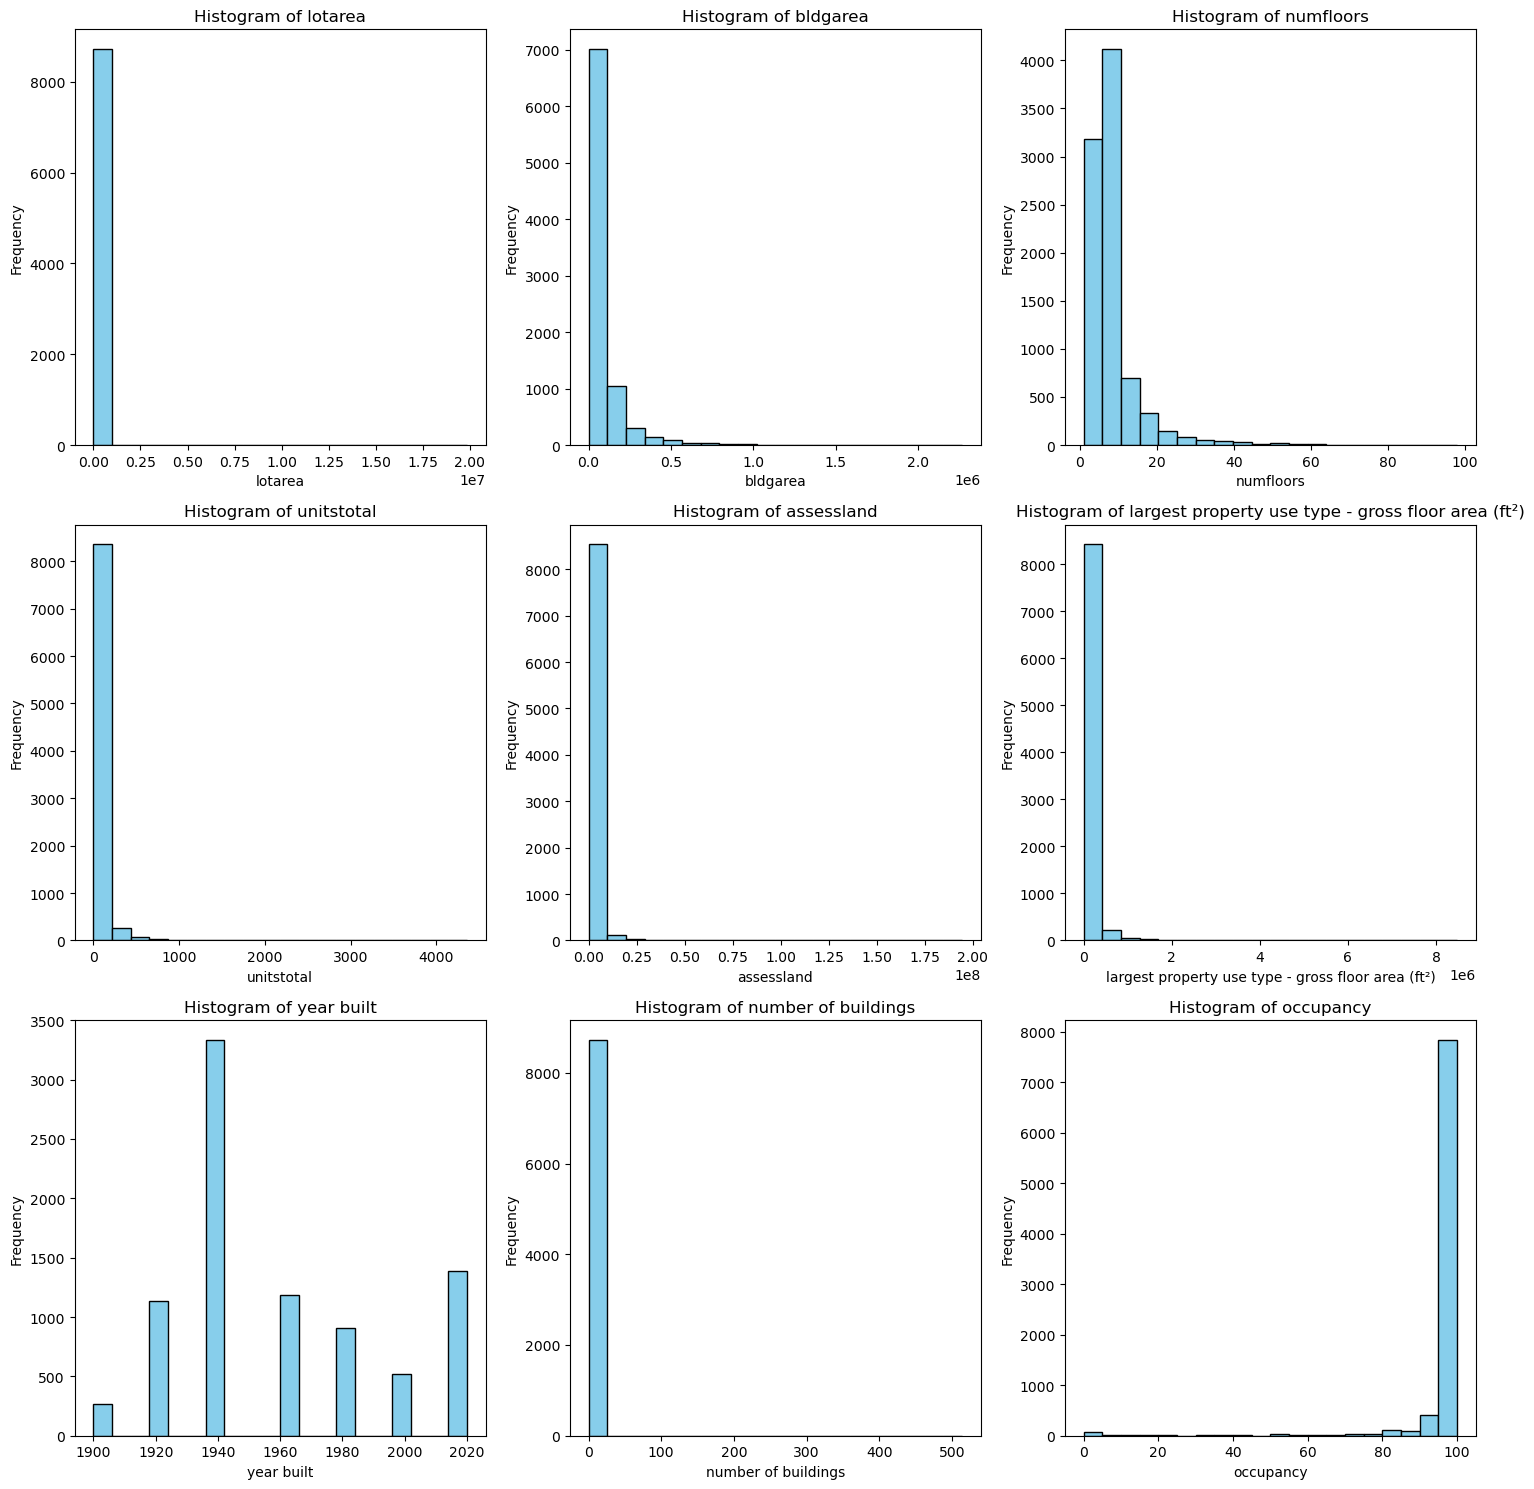

In [101]:

# Number of rows and columns in the grid
n_rows, n_cols = 3, 3

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()  

# Plotting histograms for each numeric column
for i, column in enumerate(df_e.select_dtypes(include=np.number).columns):
    if i >= n_rows * n_cols:  
        break
    axes[i].hist(df_e[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[i+1:]:
    ax.remove()

plt.tight_layout()
plt.show()

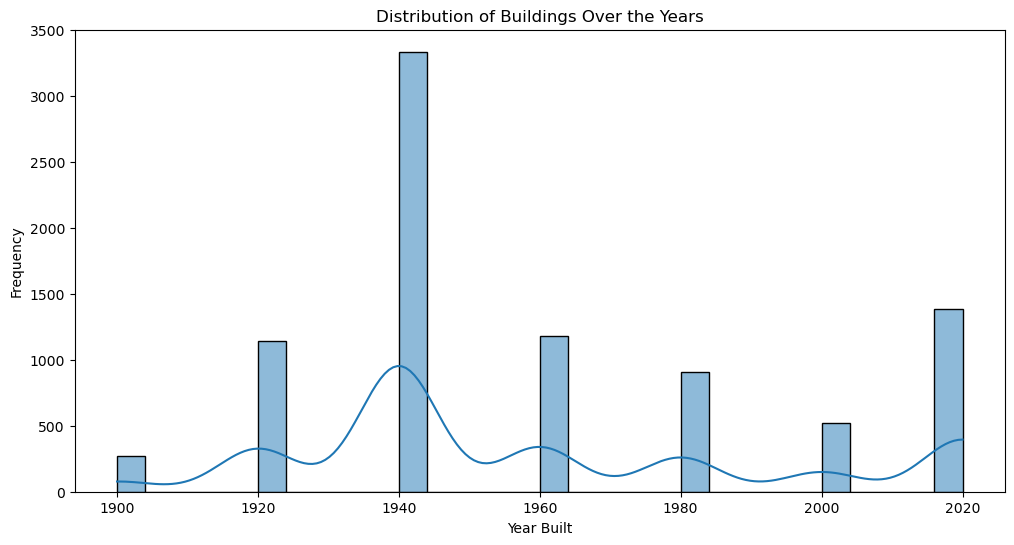

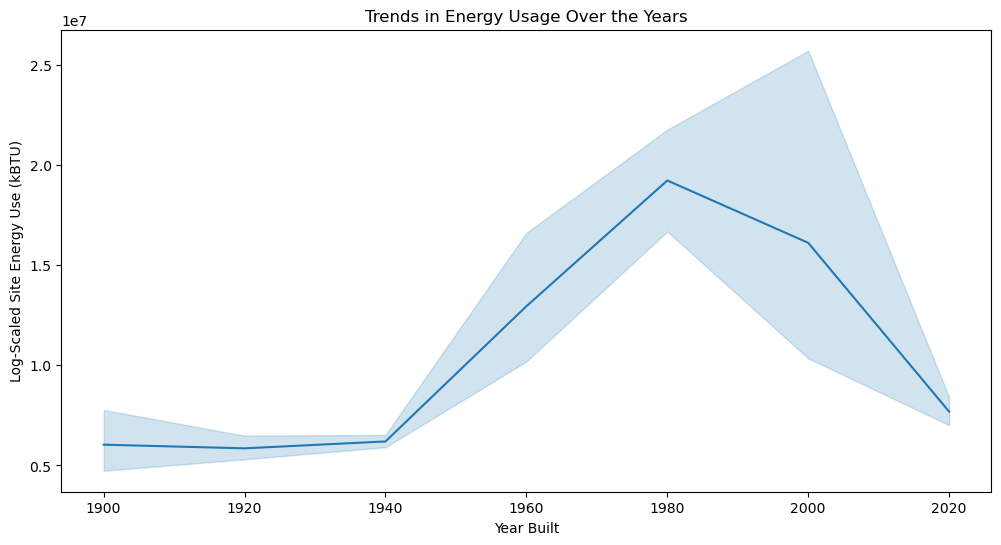

In [102]:
#Visualization 
# Distribution of buildings over the years
plt.figure(figsize=(12, 6))
sns.histplot(df_e['year built'] , bins=30, kde=True)
plt.title('Distribution of Buildings Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()


# Trends in energy usage over the years
plt.figure(figsize=(12, 6))
#sns.lineplot(x='year built', y='site energy use (kbtu)', data=df_e)
sns.lineplot(x='year built', y='site energy use (kbtu)', data=df_e)
plt.title('Trends in Energy Usage Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Log-Scaled Site Energy Use (kBTU)')
plt.show()

In [103]:
df_e.shape

(8738, 25)

In [104]:
df_e['comarea'].value_counts()

comarea
0.0         3923
3000.0        82
1000.0        80
4000.0        76
2000.0        70
            ... 
53856.0        1
185000.0       1
50451.0        1
405.0          1
114287.0       1
Name: count, Length: 3355, dtype: int64

In [105]:
df_e['site energy use (kbtu)'].value_counts()

site energy use (kbtu)
0.0           17
5717602.5      2
10598939.2     2
910888.6       2
5759930.6      2
              ..
3113215.1      1
3170911.2      1
8252308.4      1
221496.8       1
11905190.8     1
Name: count, Length: 8647, dtype: int64

In [106]:
# Create a list of numerical column names
num = df_e.select_dtypes(include=['float64', 'int64']).columns.tolist()


print("Numerical columns:", num)
#print("Categorical columns:", cat)

Numerical columns: ['lotarea', 'bldgarea', 'numfloors', 'unitstotal', 'assessland', 'largest property use type - gross floor area (ft²)', 'year built', 'number of buildings', 'occupancy', 'property gfa - self-reported (ft²)', 'postal code', 'landuse', 'comarea', 'resarea', 'unitsres', 'bldgdepth', 'lottype', 'bsmtcode', 'builtfar', 'residfar', 'commfar', 'facilfar', 'site energy use (kbtu)']


In [107]:
# Create a list of numerical column names
num = df_e.select_dtypes(include=['float64', 'int64']).columns.tolist()

num_exception = [ 'unitstotal','year built', 'number of buildings','occupancy', 'unitsres',
                'bldgdepth','lottype','bsmtcode','landuse']


# Update num and cat list by removing exceptions
num_up = [column for column in num if column not in num_exception]

num_up

['lotarea',
 'bldgarea',
 'numfloors',
 'assessland',
 'largest property use type - gross floor area (ft²)',
 'property gfa - self-reported (ft²)',
 'postal code',
 'comarea',
 'resarea',
 'builtfar',
 'residfar',
 'commfar',
 'facilfar',
 'site energy use (kbtu)']

In [108]:
columns_to_convert = ['landuse', 'lottype', 'bsmtcode', 'postal code','year built', 'construction status','unitsres']
#'postal code',
# Convert selected columns to object data type
df_e[columns_to_convert] = df_e[columns_to_convert].astype('object')

In [109]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8738 entries, 0 to 9721
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   lotarea                                             8738 non-null   float64
 1   bldgarea                                            8738 non-null   float64
 2   numfloors                                           8738 non-null   float64
 3   unitstotal                                          8738 non-null   float64
 4   assessland                                          8738 non-null   float64
 5   largest property use type - gross floor area (ft²)  8738 non-null   float64
 6   year built                                          8738 non-null   object 
 7   construction status                                 8738 non-null   object 
 8   number of buildings                                 8738 non-null   int64  
 9   oc

In [110]:
#sanity check 
df_e.shape

(8738, 25)

In [111]:
# Create copies of df_e for logarithmic and square root transformations
df_e_lt = df_e.copy()
df_e_srt = df_e.copy()

In [115]:
# Apply logarithmic transformation and create new columns
for col in num_up:
    # Check if the column contains numeric values
    if np.issubdtype(df_e_lt[col].dtype, np.number):
        # Transforming and creating new columns
        df_e_lt[col + '_log'] = np.log1p(df_e_lt[col])

# Drop the original columns that were transformed
df_e_lt.drop(columns=num_up, inplace=True)

In [116]:
df_e_lt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8738 entries, 0 to 9721
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   unitstotal                                              8738 non-null   float64
 1   year built                                              8738 non-null   object 
 2   construction status                                     8738 non-null   object 
 3   number of buildings                                     8738 non-null   int64  
 4   occupancy                                               8738 non-null   int64  
 5   primary property type - self selected                   8738 non-null   object 
 6   landuse                                                 8738 non-null   object 
 7   unitsres                                                8738 non-null   object 
 8   bldgdepth                                  

In [118]:
# Apply square root transformation and create new columns
for col in num_up:
    # Check if the column contains numeric values
    if np.issubdtype(df_e_srt[col].dtype, np.number):
        # Transforming and creating new columns
        df_e_srt[col + '_sqrt'] = np.sqrt(df_e_srt[col])

# Drop the original columns that were transformed
df_e_srt.drop(columns=num_up, inplace=True)

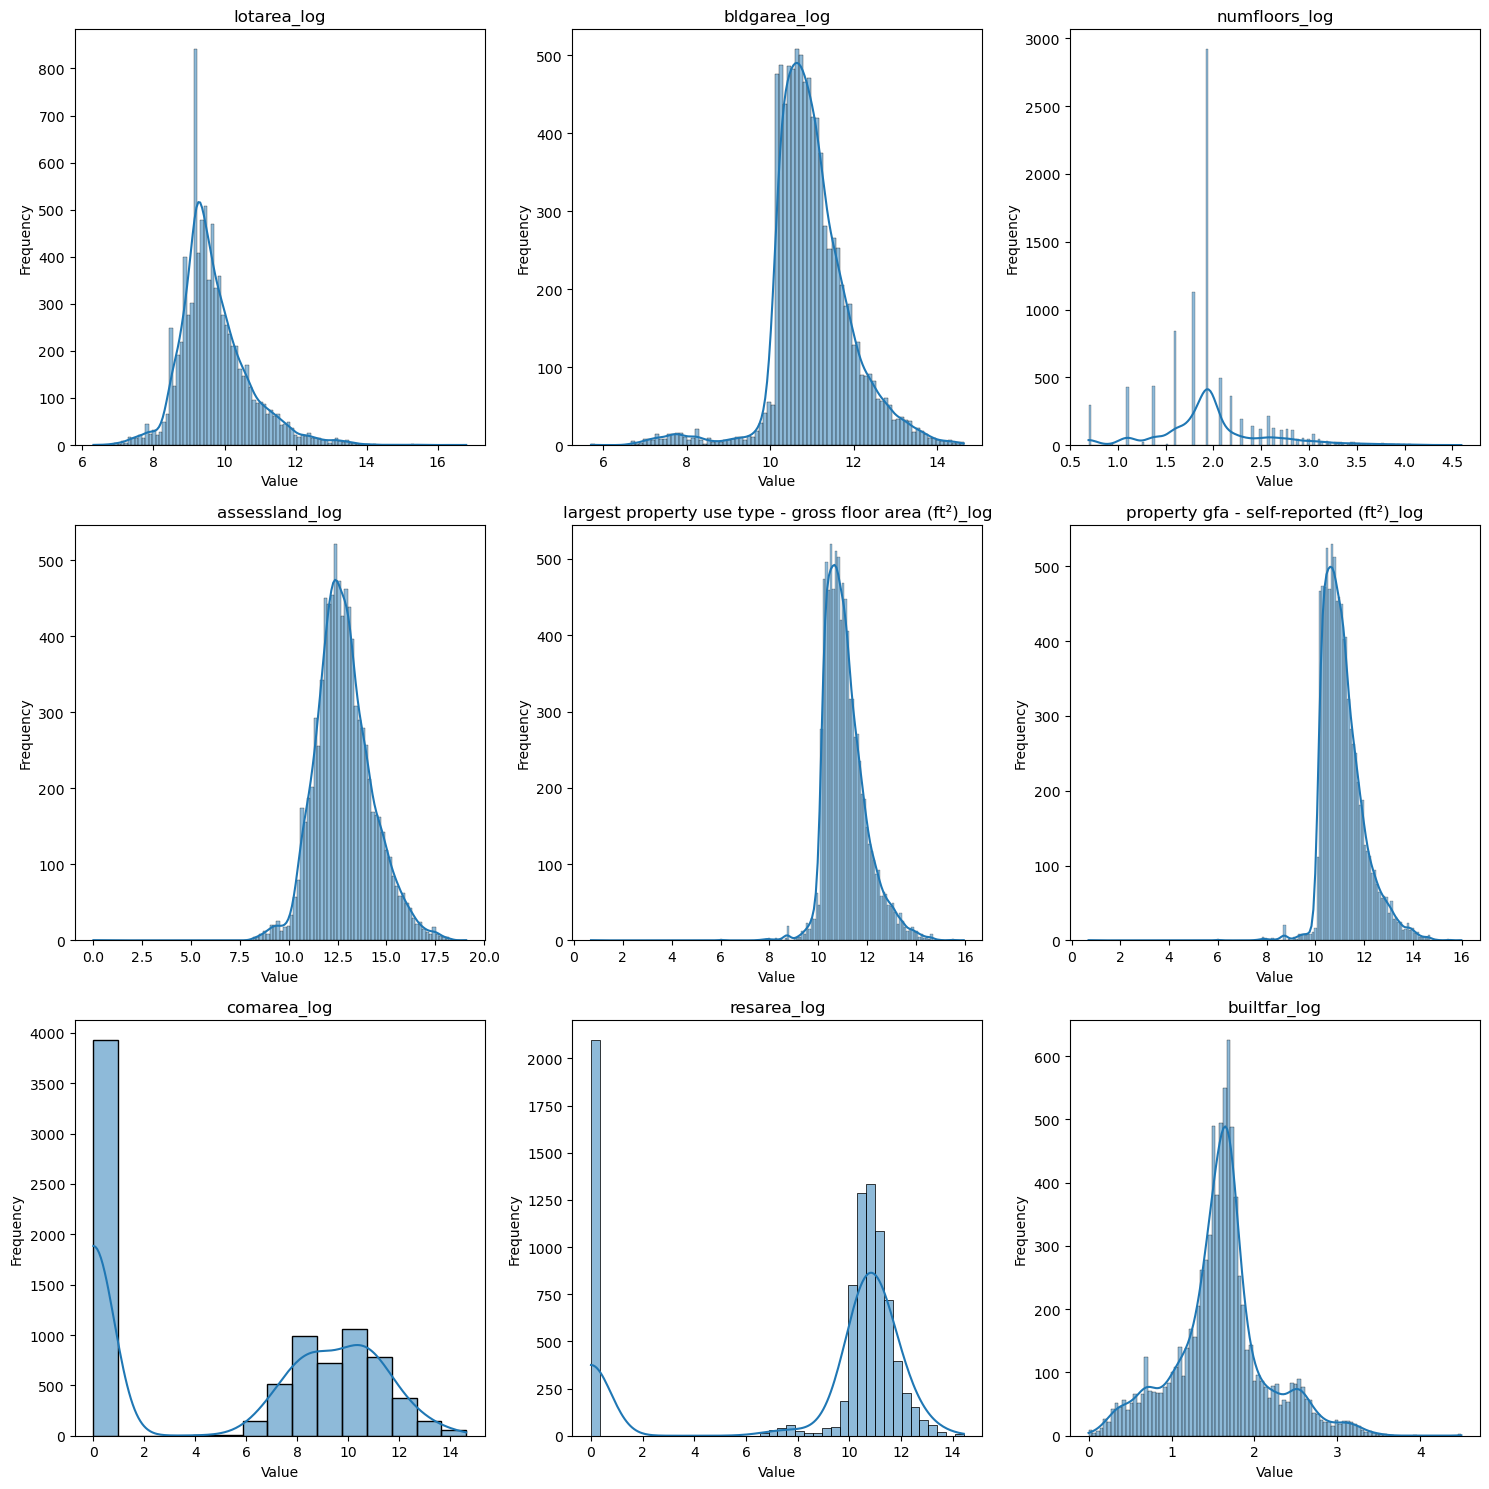

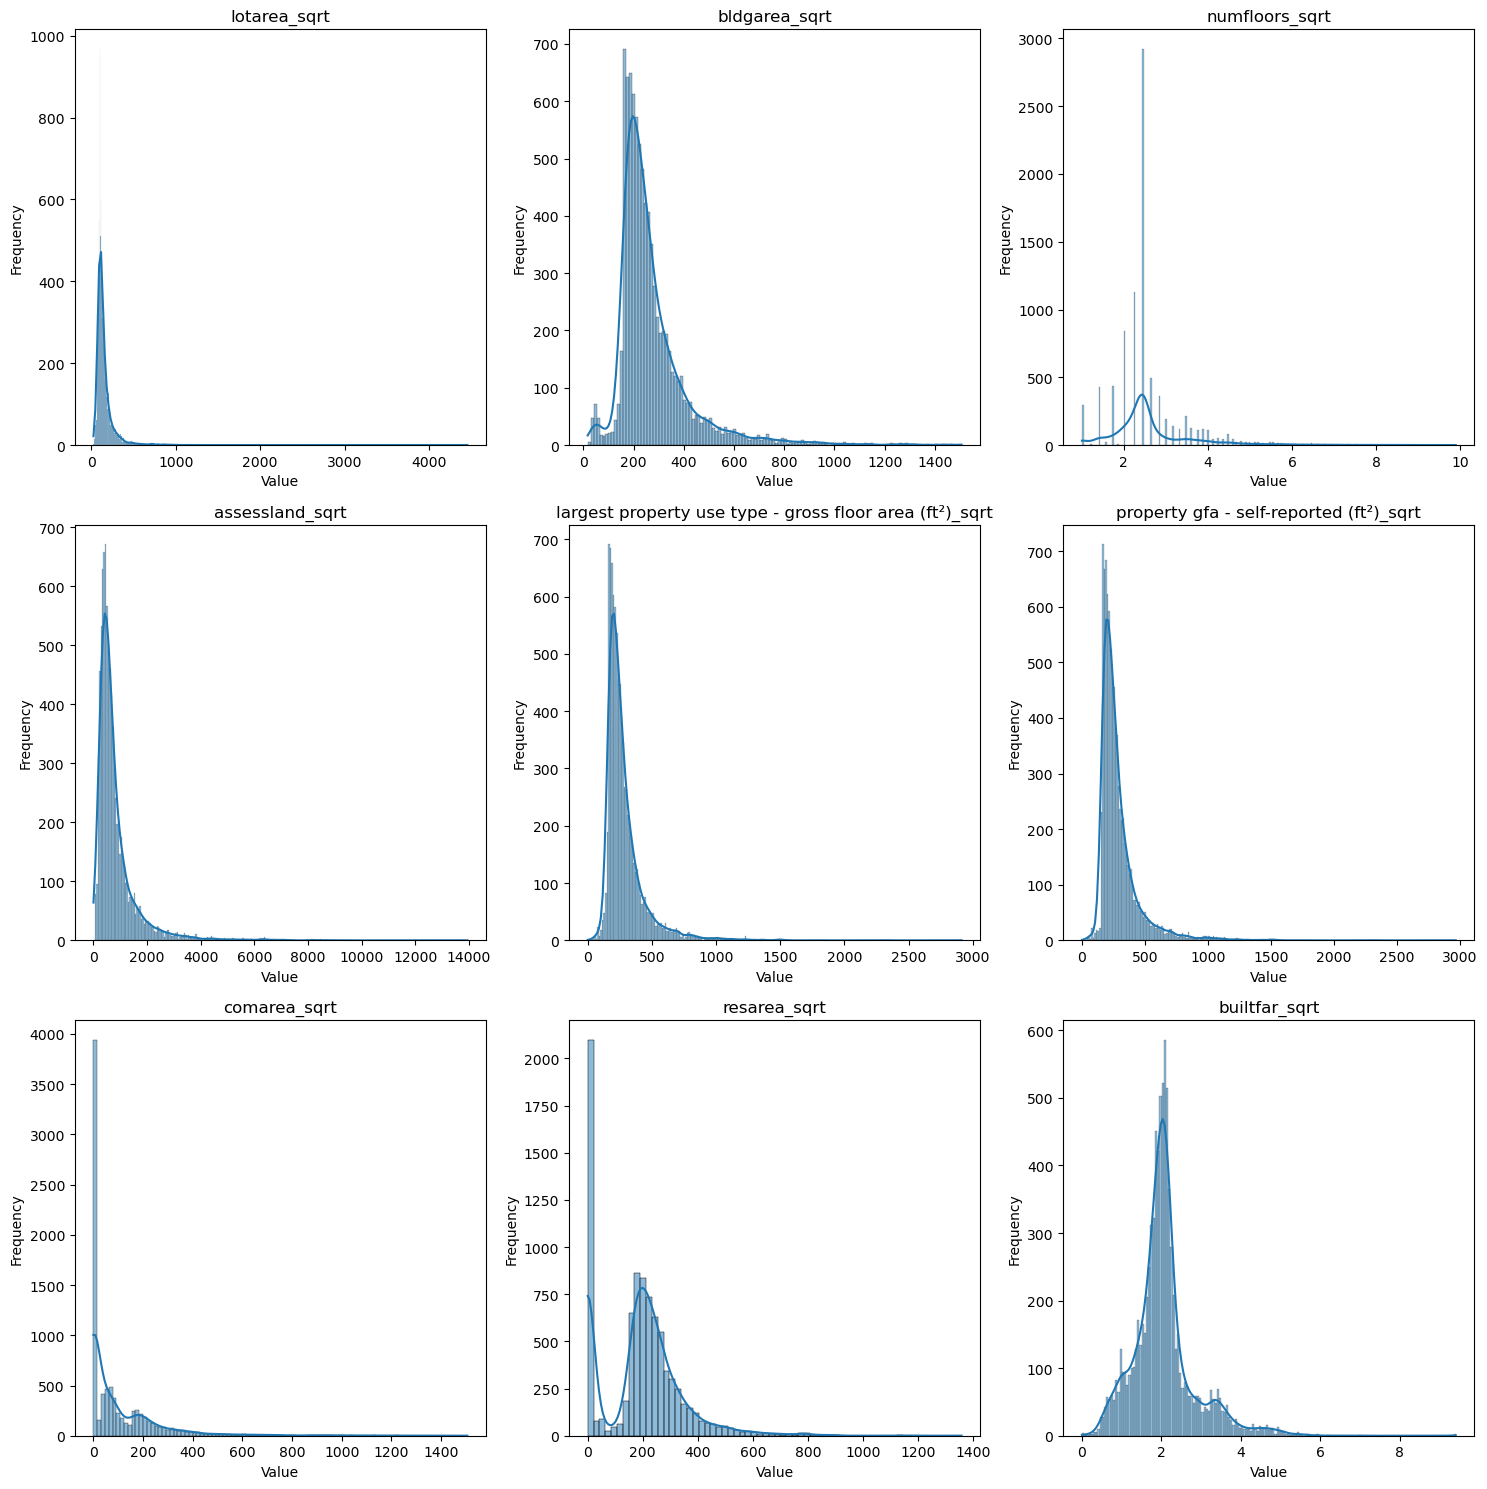

In [119]:
# Function to create 3x3 grid of histograms for columns ending with a specific suffix
def plot_transformed_columns_3x3(df, suffix):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 3x3 matrix of axes

    # Filter columns that end with the specified suffix
    columns_to_plot = [col for col in df.columns if col.endswith(suffix)]

    # Adjust the number of plots based on the number of columns
    num_plots = min(len(columns_to_plot), 9)

    for i in range(num_plots):
        col = columns_to_plot[i]
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    # Hide any empty subplots
    for j in range(num_plots, 9):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Visualize the columns ending with '_log' in df_e_lt
plot_transformed_columns_3x3(df_e_lt, '_log')

plot_transformed_columns_3x3(df_e_srt, '_sqrt')

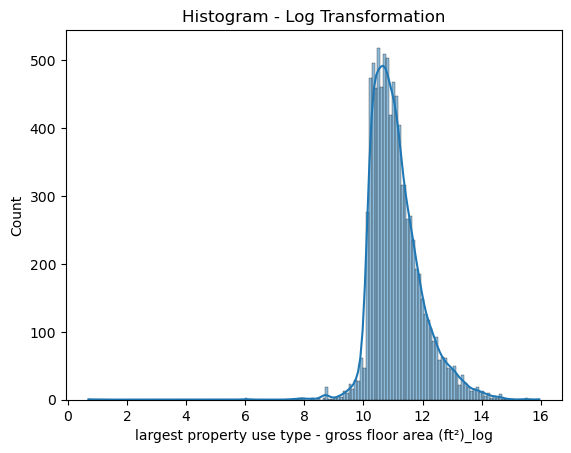

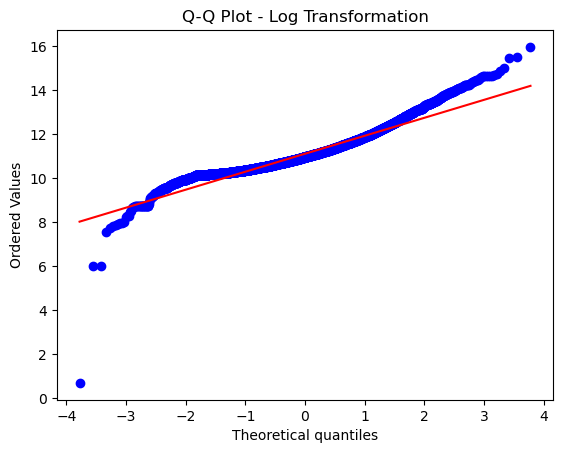

In [121]:
#visualizing the distribution 

# Function to create a Q-Q plot
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# selecting column
column = 'largest property use type - gross floor area (ft²)_log'

# Histogram and Q-Q plot for Log Transformation
sns.histplot(df_e_lt[column], kde=True)
plt.title('Histogram - Log Transformation')
plt.show()

qq_plot(df_e_lt[column], 'Q-Q Plot - Log Transformation')



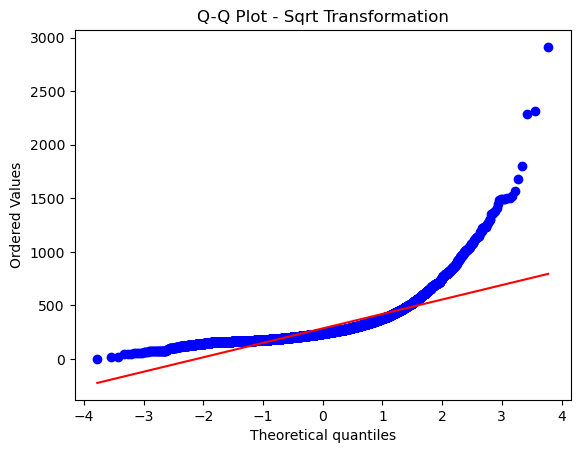

In [122]:
column = 'largest property use type - gross floor area (ft²)_sqrt'
qq_plot(df_e_srt[column], 'Q-Q Plot - Sqrt Transformation')

In [124]:
# As we can see, the distribution with log is closer to the normal  


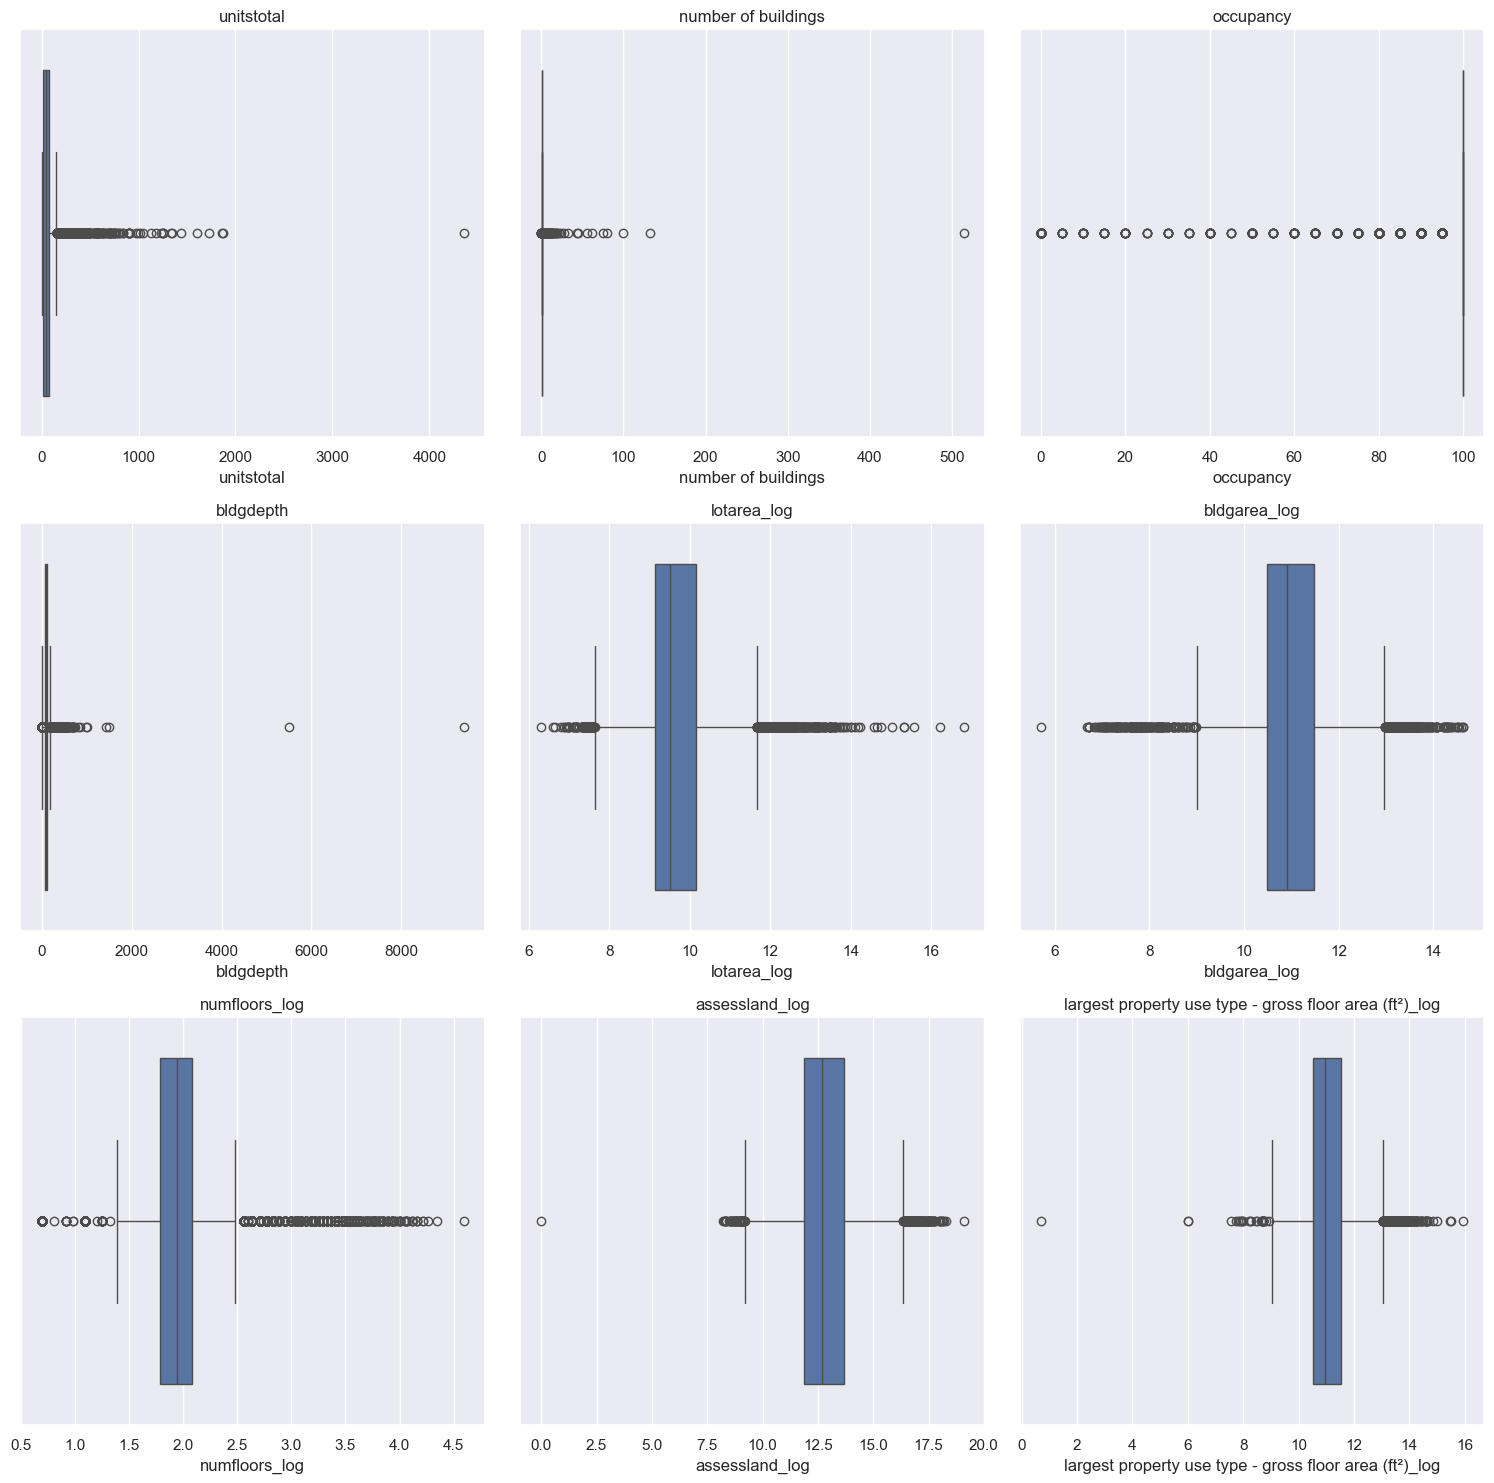

In [125]:

# Set the aesthetic style of the plots
sns.set()

# Select only numerical columns for plotting
numerical_columns = df_e_lt.select_dtypes(include=[np.number]).columns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 3x3 matrix of axes

# Plot boxplots in the grid
for i, col in enumerate(numerical_columns):
    if i < 9:  # Ensure we don't go beyond 9 plots
        sns.boxplot(x=df_e_lt[col], ax=axes[i])
        axes[i].set_title(col)
    else:
        break  

# Hide any unused subplots
for j in range(i, 9):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [126]:
#sns.pairplot(df_e_lt)

In [127]:
df_e_lt_numeric = df_e_lt.select_dtypes(include=['float64', 'int64'])


In [128]:
#sns.pairplot(df_e_lt_numeric)

In [129]:
#selecting columns to plot
columns_to_plot = [
    'lotarea_log',
    'bldgarea_log',
    
    'assessland_log',
    'site energy use (kbtu)_log','largest property use type - gross floor area (ft²)_log',
     'property gfa - self-reported (ft²)_log'
    
    
]

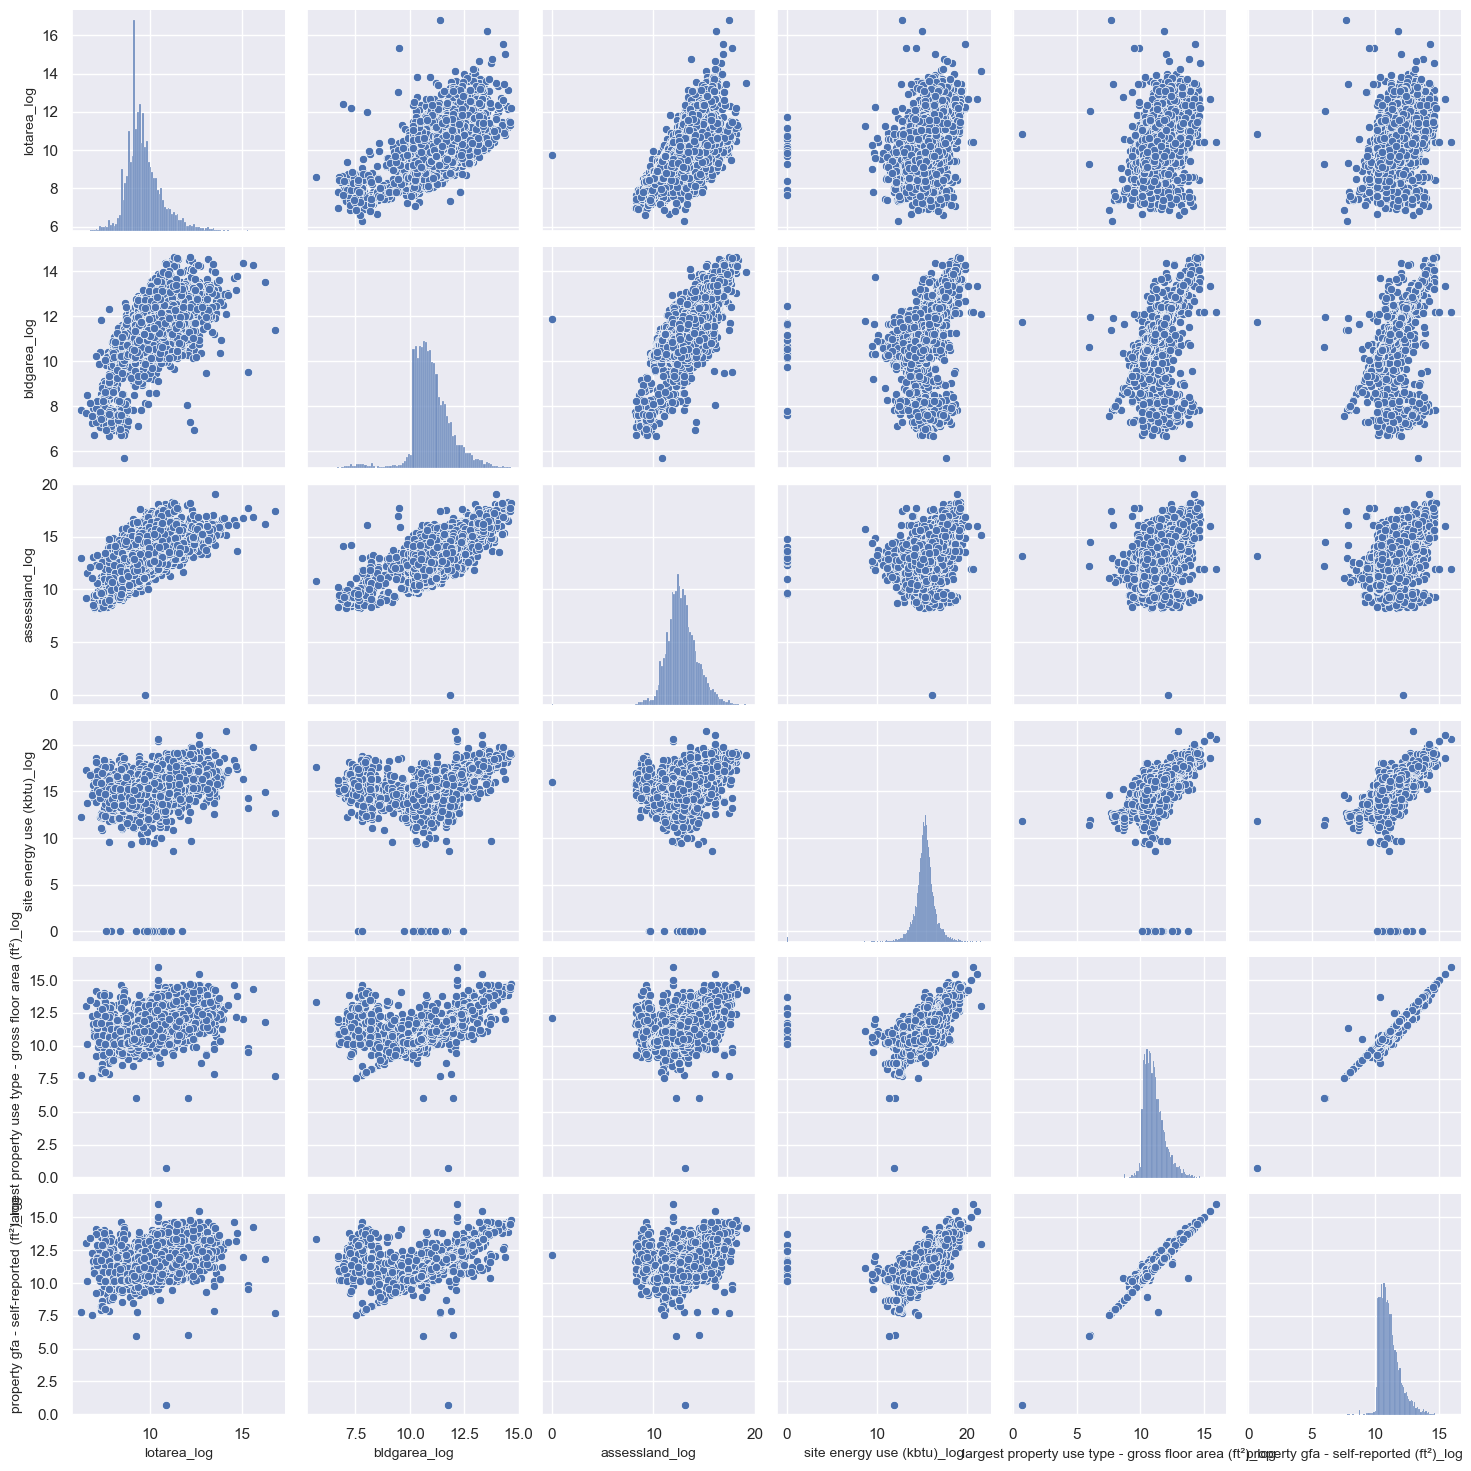

In [130]:
import seaborn as sns


# Create a pairplot and assign it to pair_plot
plot = sns.pairplot(df_e_lt[columns_to_plot])

# Adjust label sizes in the pairplot
for ax in plot.axes.flatten():
    # Adjust x-axis label font size
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10)
    # Adjust y-axis label font size
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10)

plt.show()

In [131]:
df_e_lt_numeric.corr()

unitstotal  \
unitstotal                                            1.000000   
number of buildings                                   0.054700   
occupancy                                             0.051500   
bldgdepth                                             0.030378   
lotarea_log                                           0.281961   
bldgarea_log                                          0.449548   
numfloors_log                                         0.402938   
assessland_log                                        0.260032   
largest property use type - gross floor area (f...    0.455331   
property gfa - self-reported (ft²)_log                0.449396   
comarea_log                                          -0.046832   
resarea_log                                           0.340989   
builtfar_log                                          0.183551   
residfar_log                                          0.138195   
commfar_log                                           0.001342   
facilfar_log                                          0.109571   
site energy use (kbtu)_log                            0.328532   

                                                    number of buildings  \
unitstotal                                                     0.054700   
number of buildings                                            1.000000   
occupancy                                                      0.003800   
bldgdepth                                                     -0.004077   
lotarea_log                                                    0.093094   
bldgarea_log                                                   0.039378   
numfloors_log                                                 -0.034435   
assessland_log                                                 0.035735   
largest property use type - gross floor area (f...             0.074816   
property gfa - self-reported (ft²)_log                         0.073791   
comarea_log                                                   -0.024944   
resarea_log                                                    0.022899   
builtfar_log                                                  -0.060760   
residfar_log                                                  -0.040084   
commfar_log                                                   -0.016737   
facilfar_log                                                  -0.049070   
site energy use (kbtu)_log                                     0.052171   

                                                    occupancy  bldgdepth  \
unitstotal                                           0.051500   0.030378   
number of buildings                                  0.003800  -0.004077   
occupancy                                            1.000000  -0.016441   
bldgdepth                                           -0.016441   1.000000   
lotarea_log                                         -0.000111   0.239190   
bldgarea_log                                        -0.000611   0.193120   
numfloors_log                                        0.019297  -0.038175   
assessland_log                                      -0.100981   0.176989   
largest property use type - gross floor area (f...  -0.017306   0.156459   
property gfa - self-reported (ft²)_log              -0.024622   0.157256   
comarea_log                                         -0.168897   0.132686   
resarea_log                                          0.210801  -0.131476   
builtfar_log                                        -0.018791  -0.057021   
residfar_log                                         0.023121  -0.068797   
commfar_log                                         -0.169886   0.062763   
facilfar_log                                        -0.026924  -0.028748   
site energy use (kbtu)_log                           0.207239   0.099198   

                                                    lotarea_log  bldgarea_log  \
unitstotal                                             0.28196

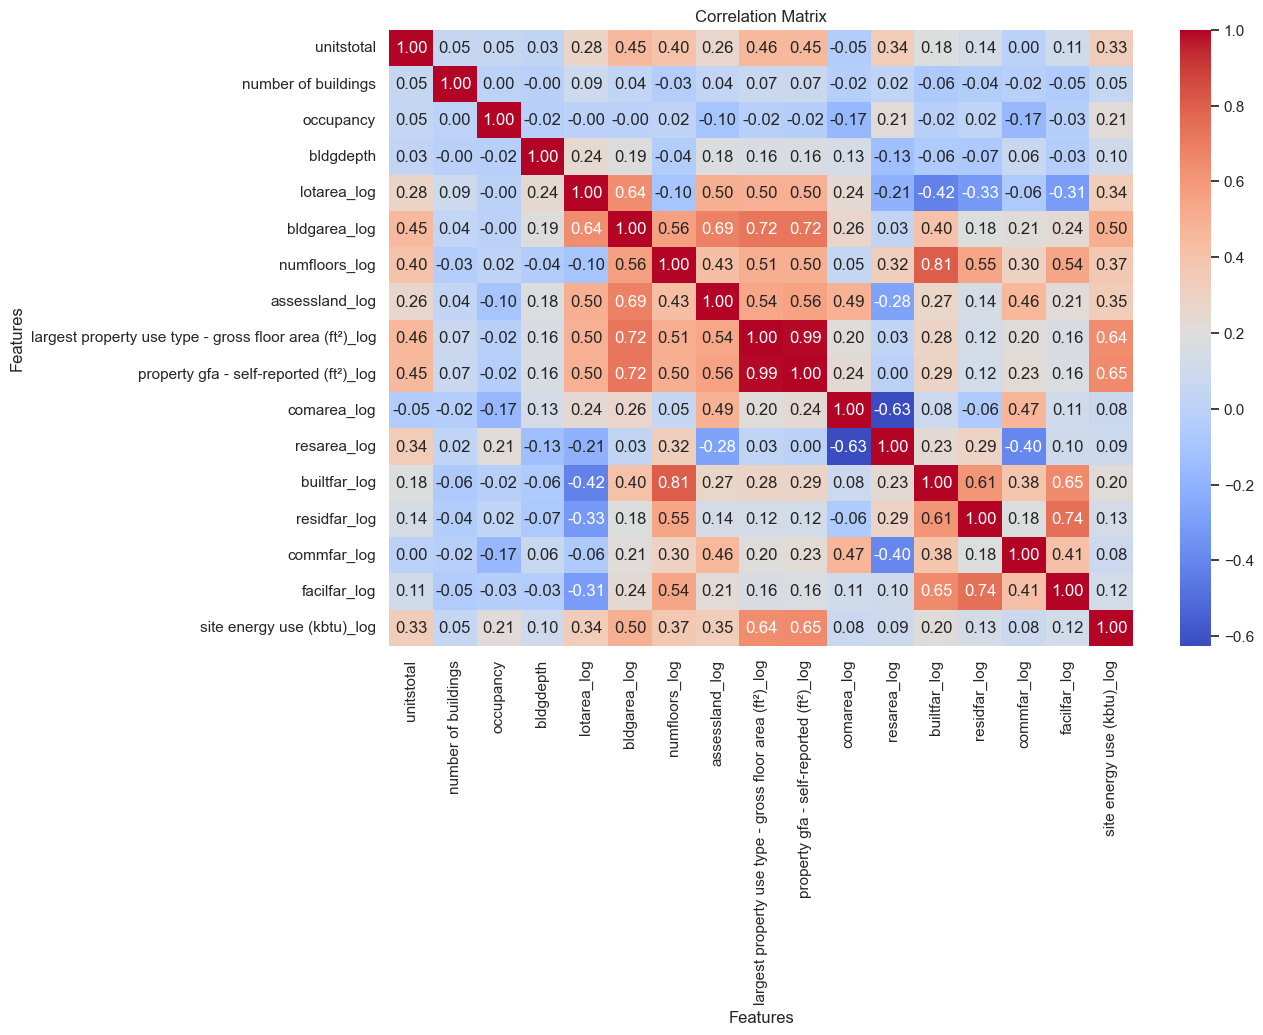

In [132]:

# 'total (location-based) ghg emissions (metric tons co2e)_log',
# Set the size of the figure
plt.figure(figsize=(12, 8))
#corr_matrix = (df_e_lt[columns_to_plot]).corr()
corr_matrix = df_e_lt_numeric.corr()
# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()


In [133]:
df_e_lt.shape

(8738, 24)

In [134]:
#choosing the non zero values
df_e_lt= df_e_lt[df_e_lt['site energy use (kbtu)_log']!= 0]


In [135]:
df_e_lt.shape

(8721, 24)

In [136]:
#value counts 
for column in df_e_lt.columns:
    print(f"=== Value Counts for {column} ===")
    print(df_e_lt[column].value_counts())
    print("\n")


=== Value Counts for unitstotal ===
unitstotal
1.0      1064
2.0       269
60.0      178
48.0      161
42.0      151
         ... 
498.0       1
506.0       1
223.0       1
396.0       1
550.0       1
Name: count, Length: 453, dtype: int64


=== Value Counts for year built ===
year built
1940    3331
2020    1384
1960    1182
1920    1137
1980     900
2000     518
1900     269
Name: count, dtype: int64


=== Value Counts for construction status ===
construction status
existing    8717
test           3
design         1
Name: count, dtype: int64


=== Value Counts for number of buildings ===
number of buildings
1      8394
2       140
3        61
4        32
5        15
6        13
0         9
12        8
8         7
10        6
7         6
11        4
13        3
9         3
19        2
45        1
32        1
132       1
75        1
62        1
16        1
56        1
14        1
17        1
24        1
514       1
15        1
22        1
18        1
80        1
28        1
99        1


Features understanding: 

Meanfull Zeros
'unitsres' 0 = 1827 #If there are no residential units in the tax lot, this field will be zero
'occupancy' 0 =45 #% of Gross Floor Area GFA that is occupied and Operational (Zero is meaningfull saying that no one live here)
 'easements' 0 = 7612 #If the number of easements is zero, the tax lot has no easements
'lottype' 0 = Unknown #code indicating the location of the tax lot in relationship to another tax lot and/or the water.
'resarea' 0 = 1858 #portion of the building for residential use (common area)(Zero mean there s no common area)



In [137]:
df_e_lt.describe()

unitstotal  number of buildings    occupancy    bldgdepth  \
count  8721.000000          8721.000000  8721.000000  8721.000000   
mean     65.578259             1.242174    97.014104   111.188290   
std     111.757663             6.061577    11.869402   135.823769   
min       0.000000             0.000000     0.000000     0.000000   
25%      17.000000             1.000000   100.000000    80.000000   
50%      45.000000             1.000000   100.000000    95.000000   
75%      72.000000             1.000000   100.000000   126.330000   
max    4356.000000           514.000000   100.000000  9388.000000   

       lotarea_log  bldgarea_log  numfloors_log  assessland_log  \
count  8721.000000   8721.000000    8721.000000     8721.000000   
mean      9.705419     11.004714       1.973588       12.831826   
std       0.978073      0.932122       0.559896        1.453132   
min       6.309918      5.707110       0.693147        0.000000   
25%       9.145909     10.480129       1.791759       11.883834   
50%       9.515617     10.901579       1.945910       12.699552   
75%      10.152338     11.476718       2.079442       13.675560   
max      16.803735     14.634376       4.595120       19.085435   

       largest property use type - gross floor area (ft²)_log  \
count                                        8721.000000        
mean                                           11.101437        
std                                             0.846389        
min                                             0.693147        
25%                                            10.512791        
50%                                            10.957451        
75%                                            11.522886        
max                                            15.953352        

       property gfa - self-reported (ft²)_log  comarea_log  resarea_log  \
count                             8721.000000  8721.000000  8721.000000   
mean                                11.134182     5.326954     8.265826   
std                                  0.845861     4.983679     4.706236   
min                                  0.693147     0.000000     0.000000   
25%                                 10.540038     0.000000     7.621195   
50%                                 10.977295     7.403061    10.577477   
75%                                 11.547868    10.146081    11.149096   
max                                 15.991594    14.634376    14.426094   

       builtfar_log  residfar_log  commfar_log  facilfar_log  \
count   8721.000000   8721.000000  8721.000000   8721.000000   
mean       1.598404      1.363865     0.415888      1.683574   
std        0.564726      0.645243     0.797027      0.500441   
min        0.000000      0.000000     0.000000      0.000000   
25%        1.342865      1.232560     0.000000      1.386294   
50%        1.609438      1.490654     0.000000      1.757858   
75%        1.805005      1.791759     0.000000      2.014903   
max        4.494797      2.397895     2.772589      2.772589   

       site energy use (kbtu)_log  
count                 8721.000000  
mean                    15.342724  
std                      1.057913  
min                      8.614574  
25%                     14.827892  
50%                     15.336902  
75%                     15.862390  
max                     21.515786

In [138]:
df_e_lt.shape

(8721, 24)

In [139]:
df_e_lt_numeric_columns = df_e_lt.select_dtypes(include=['float', 'int']).columns
df_e_lt_numeric_columns

Index(['unitstotal', 'number of buildings', 'occupancy', 'bldgdepth',
       'lotarea_log', 'bldgarea_log', 'numfloors_log', 'assessland_log',
       'largest property use type - gross floor area (ft²)_log',
       'property gfa - self-reported (ft²)_log', 'comarea_log', 'resarea_log',
       'builtfar_log', 'residfar_log', 'commfar_log', 'facilfar_log',
       'site energy use (kbtu)_log'],
      dtype='object')

In [140]:

numeric_columns = df_e_lt.select_dtypes(include=['float', 'int']).columns

# Loop through each numeric column and remove outliers
for col in numeric_columns:
    mean_value = df_e_lt[col].mean()
    std_dev_value = df_e_lt[col].std()
    
    # Define a threshold for outliers (e.g., 3 standard deviations)
    threshold = 3
    
    # Identify outliers in the current column
    outliers = ((df_e_lt[col] - mean_value).abs() > threshold * std_dev_value)
    
    # Remove outliers from the current column
    df_e_lt[col] = np.where(outliers, np.nan, df_e_lt[col])



df_e_lt

unitstotal year built construction status  number of buildings  \
0            3.0       2000            existing                  1.0   
18          48.0       1940            existing                  1.0   
19          38.0       1940            existing                  1.0   
20         125.0       1980            existing                  1.0   
22           NaN       1980            existing                  1.0   
...          ...        ...                 ...                  ...   
9715        40.0       1940            existing                  1.0   
9716        56.0       1940            existing                  1.0   
9717        57.0       1940            existing                  1.0   
9720        65.0       1940            existing                  1.0   
9721        65.0       1940            existing                  2.0   

      occupancy primary property type - self selected landuse unitsres  \
0         100.0                                office     5.0      0.0   
18        100.0                   multifamily housing     3.0     48.0   
19         95.0                   multifamily housing     2.0     38.0   
20        100.0                   multifamily housing     3.0    120.0   
22        100.0                   multifamily housing     3.0    414.0   
...         ...                                   ...     ...      ...   
9715      100.0                   multifamily housing     2.0     40.0   
9716      100.0                   multifamily housing     3.0     56.0   
9717      100.0                   multifamily housing     3.0     57.0   
9720      100.0                   multifamily housing     4.0     62.0   
9721      100.0                   multifamily housing     4.0     62.0   

      bldgdepth lottype  ... assessland_log  \
0        240.00     3.0  ...      14.573040   
18        90.00     3.0  ...      12.806285   
19        93.00     3.0  ...      12.118066   
20         0.00     5.0  ...      13.303708   
22        72.00     5.0  ...      14.938632   
...         ...     ...  ...            ...   
9715     102.00     3.0  ...      12.444306   
9716     100.00     3.0  ...      10.809748   
9717     102.92     5.0  ...      12.901595   
9720      72.00     3.0  ...      11.099695   
9721      72.00     3.0  ...      11.099695   

      largest property use type - gross floor area (ft²)_log  \
0                                             11.943519        
18                                            10.559270        
19                                            10.291501        
20                                            11.508927        
22                                            12.958792        
...                                                 ...        
9715                                          10.389026        
9716                                          11.054866        
9717                                          10.531910        
9720                                          11.159830        
9721                                          11.865348        

      property gfa - self-reported (ft²)_log  comarea_log  resarea_log  \
0                                  11.943519    11.943519     0.000000   
18                                 10.559270     0.000000    10.479230   
19                                 10.291501     0.000000    10.291501   
20                                 11.508927     7.960324    11.422859   
22                                 12.962296     0.000000    12.688573   
...                                      ...          ...          ...   
9715                               10.389026     0.000000    10.389026   
9716                               11.054866     0.000000    10.959558   
9717                               10.531910     0.000000    10.507230   
9720                               11.184435     8.006701    11.141876   
9721                               11.877576     8.006701    11.141876   

      builtfar_log  residfar_

In [141]:
df_e_lt = df_e_lt.dropna()

In [142]:
df_e_lt.shape

(7812, 24)

# Part 3

In [143]:
# Splitting the data
target_energy_efficiency = 'site energy use (kbtu)_log'

X = df_e_lt.drop('site energy use (kbtu)_log',axis=1)

y = df_e_lt[target_energy_efficiency]

y.shape, X.shape

((7812,), (7812, 23))

In [144]:
#Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25, random_state=42)

In [145]:
print(X_train.columns)


Index(['unitstotal', 'year built', 'construction status',
       'number of buildings', 'occupancy',
       'primary property type - self selected', 'landuse', 'unitsres',
       'bldgdepth', 'lottype', 'bsmtcode', 'lotarea_log', 'bldgarea_log',
       'numfloors_log', 'assessland_log',
       'largest property use type - gross floor area (ft²)_log',
       'property gfa - self-reported (ft²)_log', 'comarea_log', 'resarea_log',
       'builtfar_log', 'residfar_log', 'commfar_log', 'facilfar_log'],
      dtype='object')


In [146]:
# Create a list of categorical column names
cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat

['year built',
 'construction status',
 'primary property type - self selected',
 'landuse',
 'unitsres',
 'lottype',
 'bsmtcode']

In [147]:
cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat_exception = ['unitsres'] #postal code
cat_up = [col for col in cat if col not in cat_exception]
cat_up 

['year built',
 'construction status',
 'primary property type - self selected',
 'landuse',
 'lottype',
 'bsmtcode']

In [148]:
# Instantiate transformers
ohe = OneHotEncoder(drop='first', sparse=False,handle_unknown='ignore')

In [149]:



# Transform the categorical columns
X_train_encoded = ohe.fit_transform(X_train[cat_up])
X_test_encoded = ohe.transform(X_test[cat_up])

# Convert the transformed array back into a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, 
                                  columns=ohe.get_feature_names_out(cat_up), 
                                  index=X_train.index)

# Drop the original categorical columns from X_train
X_train.drop(columns=cat_up, inplace=True)

# Concatenate the remaining columns of X_train with the new one-hot encoded columns
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)

# Convert any remaining non-numeric columns to numeric types
X_train = X_train.apply(pd.to_numeric, errors='coerce')



/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [150]:
# Transform the categorical columns in X_test using the already fitted ohe
X_test_encoded = ohe.transform(X_test[cat_up])

# Convert the transformed array back into a DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded, 
                                 columns=ohe.get_feature_names_out(cat_up), 
                                 index=X_test.index)

# Drop the original categorical columns from X_test
X_test.drop(columns=cat_up, inplace=True)

# Concatenate the remaining columns of X_test with the new one-hot encoded columns
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Convert any remaining non-numeric columns to numeric types
X_test = X_test.apply(pd.to_numeric, errors='coerce')



/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [151]:
X_train.shape, y_train.shape

((5859, 99), (5859,))

In [152]:
X_test.shape

(1953, 99)

In [153]:
df_e_lt.isna().sum()

unitstotal                                                0
year built                                                0
construction status                                       0
number of buildings                                       0
occupancy                                                 0
primary property type - self selected                     0
landuse                                                   0
unitsres                                                  0
bldgdepth                                                 0
lottype                                                   0
bsmtcode                                                  0
lotarea_log                                               0
bldgarea_log                                              0
numfloors_log                                             0
assessland_log                                            0
largest property use type - gross floor area (ft²)_log    0
property gfa - self-reported (ft²)_log  

In [154]:
df_e_lt.shape

(7812, 24)

# Part 4

## Model with Linear Regression 

In [155]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression(n_jobs=50)
#model_energy.fit(X_train_e_sc, y_train_e)
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model 
y_pred_lr = lr_model.predict(X_train)
mse_e_lr = mean_squared_error(y_train, y_pred_lr)

#crossvalidation score
mse_scores_lr = -(cross_val_score(lr_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_lr_mean =mse_scores_lr.mean()
rsquared_lr = lr_model.score(X_train, y_train)
accuracy_lr = cross_val_score(lr_model, X_train,y_train).mean()

print("=== Linear Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_lr)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_lr_mean)
print("Croos validate R-Squared",accuracy_lr)

=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.2587085763398415
R-Squared 0.6486926136869011
Mean MSE:-cross val  0.27603278105784396
Croos validate R-Squared 0.6220154912338052


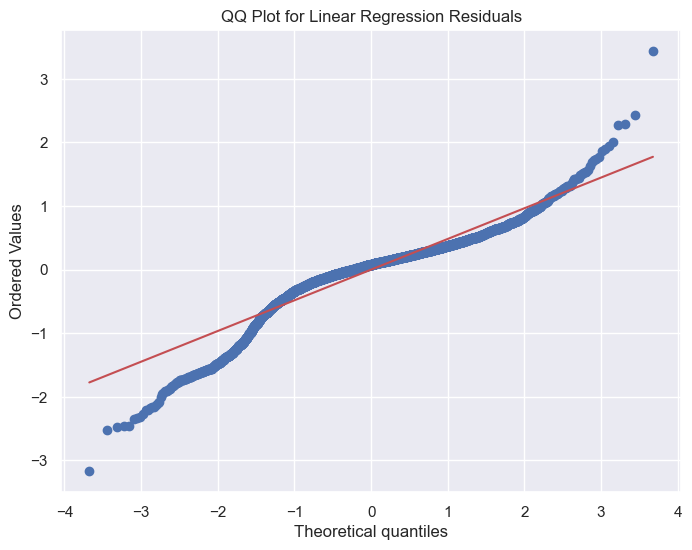

In [156]:
# Residuals calculation
residuals = y_train - y_pred_lr

# QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot for Linear Regression Residuals')
plt.show()

In [157]:
# Initialize and train the Ridge Regression model with L2 regularization
ridge_model = Ridge(alpha=0.01)  
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate the model 
y_pred_ridge = ridge_model.predict(X_train)
rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
mse_e_ridge = mean_squared_error(y_train, y_pred_ridge)

# Cross-validation score
mse_scores_ridge = -(cross_val_score(ridge_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_ridge_mean = mse_scores_ridge.mean()
rsquared_ridge = ridge_model.score(X_train, y_train)
accuracy_ridge = cross_val_score(ridge_model, X_train, y_train).mean()

print("=== Ridge Regression MODEL SUMMARY==")

print("Mean Squared Error (MSE) for Energy Efficiency model:", mse_e_ridge) # Explains variation in the target
print("Mean MSE - Cross Val:", mse_scores_ridge_mean)
print("Cross validate R-Squared:", accuracy_ridge)

=== Ridge Regression MODEL SUMMARY==
Mean Squared Error (MSE) for Energy Efficiency model: 0.25870926972836644
Mean MSE - Cross Val: 0.27598616908657725
Cross validate R-Squared: 0.6221064281941888


In [158]:
print("Root Mean Squared Error (RMSE) for Energy Efficiency model:", rmse_ridge)
print("R-Squared:", rsquared_ridge)

Root Mean Squared Error (RMSE) for Energy Efficiency model: 0.5086347114859213
R-Squared: 0.6486916721158336


In [164]:



# Initialize and train the Ridge Regression model with L2 regularization
ridge_model = Ridge(alpha=0.01)  
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate the model 
y_pred_ridge = ridge_model.predict(X_train)
mse_e_ridge = mean_squared_error(y_train, y_pred_ridge)

# Cross-validation score
mse_scores_ridge = -(cross_val_score(ridge_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_ridge_mean = mse_scores_ridge.mean()
rsquared_ridge = ridge_model.score(X_train, y_train)
accuracy_ridge = cross_val_score(ridge_model, X_train, y_train).mean()

print("=== Ridge Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_ridge)
print("R-Squared:", rsquared_ridge)  # Explains variation in the target
print("Mean MSE - Cross Val:", mse_scores_ridge_mean)
print("Cross validate R-Squared:", accuracy_ridge)


=== Ridge Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.25870926972836644
R-Squared: 0.6486916721158336
Mean MSE - Cross Val: 0.27598616908657725
Cross validate R-Squared: 0.6221064281941888


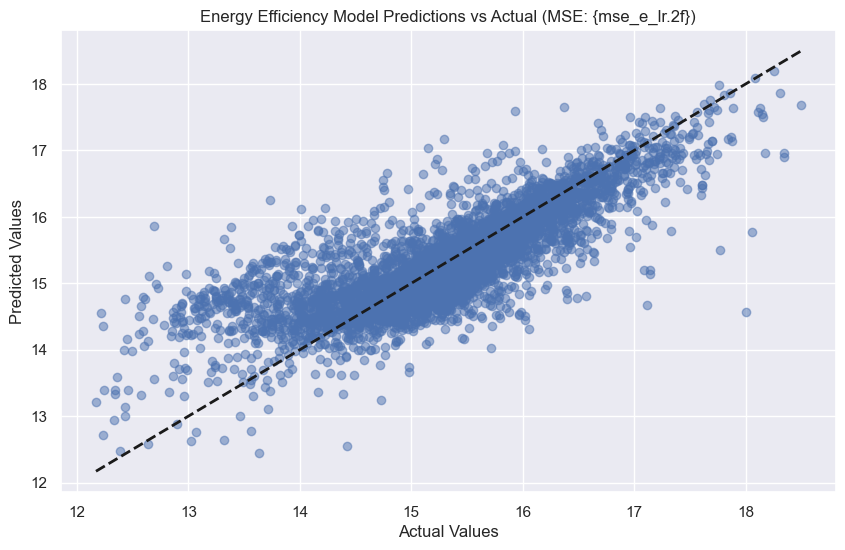

In [165]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_lr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Energy Efficiency Model Predictions vs Actual (MSE: {mse_e_lr.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


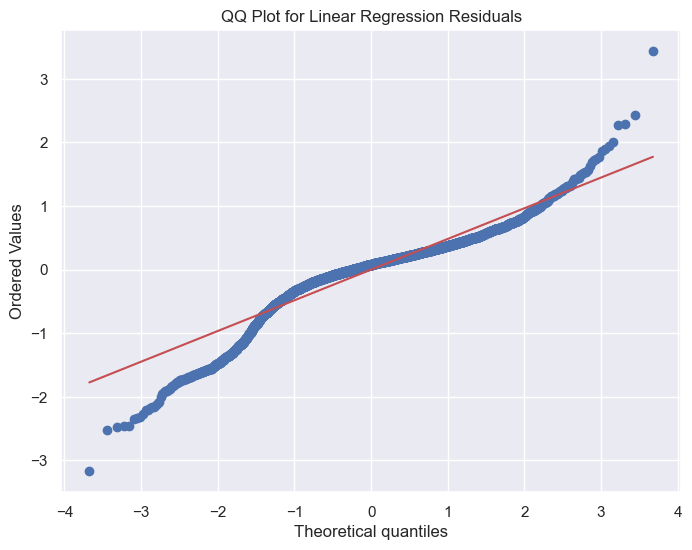

In [166]:
# Residuals calculation
residuals = y_train - y_pred_ridge

# QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot for Linear Regression Residuals')
plt.show()

In [167]:
# Get feature names
feature_names = X_train.columns

# Get coefficients
coefficients = lr_model.coef_

# Lets create a DataFrame from the features
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Sort the features by their absolute coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importances
feature_importance

Coefficient  \
primary property type - self selected_other - s...     3.422790   
primary property type - self selected_parking         -1.757792   
primary property type - self selected_self-stor...    -1.493245   
primary property type - self selected_courthouse      -1.342563   
primary property type - self selected_other - e...    -1.073721   
...                                                         ...   
occupancy                                              0.001598   
bldgdepth                                              0.000367   
commfar_log                                           -0.000346   
unitsres                                               0.000332   
unitstotal                                             0.000129   

                                                    Absolute Coefficient  
primary property type - self selected_other - s...              3.422790  
primary property type - self selected_parking                   1.757792  
primary property type - self selected_self-stor...              1.493245  
primary property type - self selected_courthouse                1.342563  
primary property type - self selected_other - e...              1.073721  
...                                                                  ...  
occupancy                                                       0.001598  
bldgdepth                                                       0.000367  
commfar_log                                                     0.000346  
unitsres                                                        0.000332  
unitstotal                                                      0.000129  

[99 rows x 2 columns]

# Part 5

## Model with Random Forest Regressor

In [181]:
#random forest regressor
rf_model_un= RandomForestRegressor()
rf_model_un.fit(X_train, y_train)
rf_model_un.score(X_train, y_train)


0.9457129359666228

In [182]:
#cross val
cross_val_score(rf_model_un, X_train, y_train, cv=5).mean()

0.6132314447528884

In [173]:

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100,max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=6,random_state=42)#n_estimators=100,max_depth=50, max_features='sqrt', min_samples_leaf=1, min_samples_split=6,
#
#Fitting the model 
rf_model.fit(X_train, y_train)

#calculate y_pred_rf on train

y_pred_train_rf = rf_model.predict(X_train)
mse_e_rf = mean_squared_error(y_train, y_pred_train_rf)
#Cross validation 
mse_scores_rf = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_scores_rf = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_rf_mean =mse_scores_rf.mean()
rsquared_rf = r2_score(y_train, y_pred_train_rf)
accuracy_rf = cross_val_score(rf_model, X_train,y_train).mean()

print("===Random Forest Regressor MODEL SUMMARY==")
print("Mean Squared Error for RF model:", mse_e_rf)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_rf_mean)
print("Cross validate R-Squared",accuracy_rf)

'''



'''

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.08972969296667604
R-Squared 0.6486926136869011
Mean MSE:-cross val  0.27846133332703643
Cross validate R-Squared 0.6240647534948305


'\n\n\n\n'

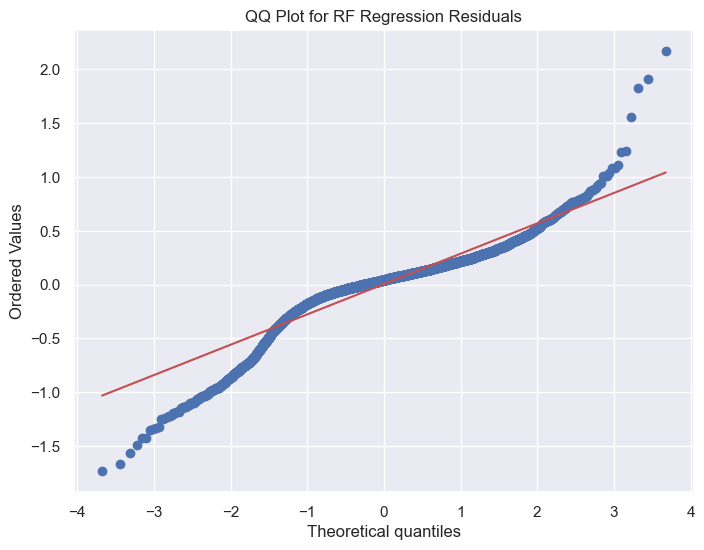

In [174]:
# Calculate residuals
residuals = y_train - y_pred_train_rf


# QQ plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot for RF Regression Residuals')
plt.show()

In [175]:
##### Using Grid search to look for the best parameters

#param_grid = {
#    'max_depth': [None, 100, 150],
#    'min_samples_leaf': [1,5,10],
#    'min_samples_split':[6, 8, 10],
#   'n_estimators':[100,150,200],
#    'max_features':['auto','sqrt', 'log2', 0.5,None ] }

#rf_model = RandomForestRegressor()

#grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)

#Best parameters
#print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
#print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

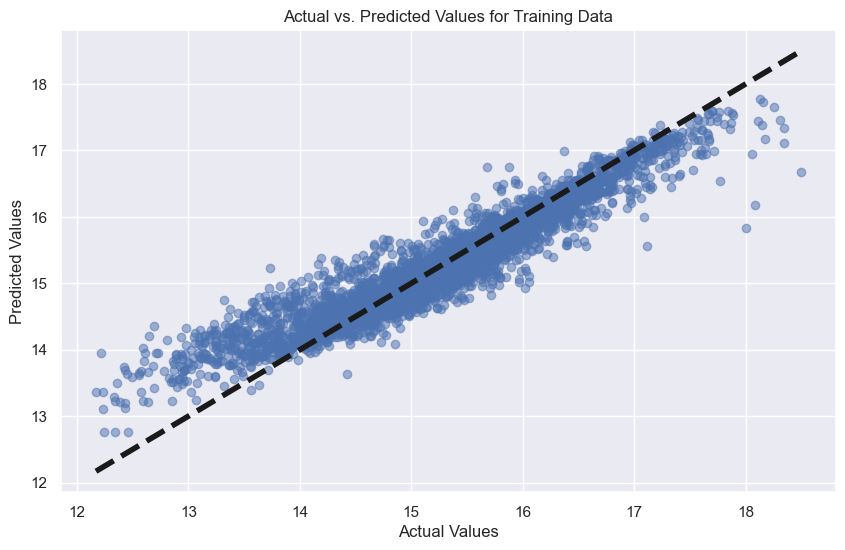

In [176]:
import matplotlib.pyplot as plt

# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_rf, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)  # Diagonal line
plt.show()

# Part 6

## Model with Gradient Descent XGboost


In [ ]:
#pip install xgboost

In [178]:
#list(X_train.columns)

In [179]:

#drop and colmn with "postal code" or "primary property" in the name
columns_to_drop=[col for col in X_train.columns if "postal code" in col.lower() or "primary property" in
        col.lower() ]

#drop column
X_train1=X_train.drop(columns=columns_to_drop )
list(X_train1.columns)

['unitstotal',
 'number of buildings',
 'occupancy',
 'unitsres',
 'bldgdepth',
 'lotarea_log',
 'bldgarea_log',
 'numfloors_log',
 'assessland_log',
 'largest property use type - gross floor area (ft²)_log',
 'property gfa - self-reported (ft²)_log',
 'comarea_log',
 'resarea_log',
 'builtfar_log',
 'residfar_log',
 'commfar_log',
 'facilfar_log',
 'year built_1920',
 'year built_1940',
 'year built_1960',
 'year built_1980',
 'year built_2000',
 'year built_2020',
 'construction status_test',
 'landuse_2.0',
 'landuse_3.0',
 'landuse_4.0',
 'landuse_5.0',
 'landuse_6.0',
 'landuse_7.0',
 'landuse_8.0',
 'landuse_9.0',
 'landuse_10.0',
 'lottype_1.0',
 'lottype_2.0',
 'lottype_3.0',
 'lottype_4.0',
 'lottype_5.0',
 'lottype_6.0',
 'lottype_7.0',
 'lottype_8.0',
 'lottype_9.0',
 'bsmtcode_1.0',
 'bsmtcode_2.0',
 'bsmtcode_5.0']

In [180]:
import xgboost as xgb

# Create the XGBoost instance
xgb_model = xgb.XGBRegressor(learning_rate=0.1,min_child_weight=10, n_estimators=100, subsample =0.8,
                             reg_lambda=1, reg_alpha=5, max_depth=2, random_state=42) 

#'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 150, 'reg_lambda': 10}

#learning_rate=0.1,min_child_weight=10, n_estimators=100, subsample =0.8

#{'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}

#{'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.8}

# Fit the model
xgb_model.fit(X_train1, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [219]:
#calculate y_pred_xgb on train

y_pred_train_xgb = xgb_model.predict(X_train1)

# Cross-validation score
mse_scores_xgb = -(cross_val_score(xgb_model, X_train1, y_train, cv=10, scoring='neg_mean_squared_error'))
mse_scores_xgb_mean = mse_scores_xgb.mean()

# Calculate Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))

# R-squared
rsquared_xgb = r2_score(y_train, y_pred_train_xgb)

# Cross-validate R-squared
accuracy_xgb = cross_val_score(xgb_model, X_train1, y_train).mean()

# Print metrics on the training set
print("=== Gradient Descent XGBoost MODEL SUMMARY==")
print("Root Mean Squared Error Training:", rmse_xgb)
print("Mean Squared Error Training:", mse_scores_xgb_mean)
print("R-squared Training:", rsquared_xgb)
print("Cross validate R-Squared:", accuracy_xgb)

'''
{'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated accuracy: -0.25

=== Gradient Descent XGBoost MODEL SUMMARY==
Root Mean Squared Error Training: 0.40317084624176414
Mean Squared Error Training: 0.26233668342243216
R-squared Training: 0.7668492174399733
Cross validate R-Squared: 0.6301215702660876

learning_rate=0.1,min_child_weight=10, n_estimators=100, subsample =0.8,reg_lambda=10,random_state=42

=== Gradient Descent XGBoost MODEL SUMMARY==
Root Mean Squared Error Training: 0.43886758826954864
Mean Squared Error Training: 0.2721437055815887
R-squared Training: 0.7384567771346018
Cross validate R-Squared: 0.6287013024946113

#(learning_rate=0.1,min_child_weight=10, n_estimators=150, subsample =0.8,reg_lambda=10,random_state=42)

=== Gradient Descent XGBoost MODEL SUMMARY==
Root Mean Squared Error Training: 0.4134547373718281
Mean Squared Error Training: 0.2742701898936803
R-squared Training: 0.7678693968451638
Cross validate R-Squared: 0.6261875705742893

(learning_rate=0.1,min_child_weight=10, n_estimators=100, subsample =0.8,
                             reg_lambda=1, reg_alpha=5, max_depth=2, random_state=42
=== Gradient Descent XGBoost MODEL SUMMARY==
Root Mean Squared Error Training: 0.5215428755552503
Mean Squared Error Training: 0.289667027894701
R-squared Training: 0.6306343631595099
Cross validate R-Squared: 0.605469499345577
'''


=== Gradient Descent XGBoost MODEL SUMMARY==
Root Mean Squared Error Training: 0.5215428755552503
Mean Squared Error Training: 0.289667027894701
R-squared Training: 0.6306343631595099
Cross validate R-Squared: 0.605469499345577


"\n{'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.8}\nBest cross-validated accuracy: -0.25\n\n=== Gradient Descent XGBoost MODEL SUMMARY==\nRoot Mean Squared Error Training: 0.40317084624176414\nMean Squared Error Training: 0.26233668342243216\nR-squared Training: 0.7668492174399733\nCross validate R-Squared: 0.6301215702660876\n\nlearning_rate=0.1,min_child_weight=10, n_estimators=100, subsample =0.8,reg_lambda=10,random_state=42\n\n=== Gradient Descent XGBoost MODEL SUMMARY==\nRoot Mean Squared Error Training: 0.43886758826954864\nMean Squared Error Training: 0.2721437055815887\nR-squared Training: 0.7384567771346018\nCross validate R-Squared: 0.6287013024946113\n\n#(learning_rate=0.1,min_child_weight=10, n_estimators=150, subsample =0.8,reg_lambda=10,random_state=42)\n\n=== Gradient Descent XGBoost MODEL SUMMARY==\nRoot Mean Squared Error Training: 0.4134547373718281\nMean Squared Error Training: 0.2742701898936803\nR-squared Tr

In [163]:
print("Root Mean Squared Error (RMSE) for Energy Efficiency model:", rmse_xgb)
print("R-Squared:", rsquared_xgb)

Root Mean Squared Error (RMSE) for Energy Efficiency model: 0.4050521128792398
R-Squared: 0.7772086840048578


In [227]:
#Using Grid search to look for the best parameters

param_grid = {
    'learning_rate':[ 0.1, 0.2],
    'max_depth': [1, 2],
    'reg_lambda': [ 1],
    'n_estimators': [150],
   
}
 #'colsample_bylevel':[0.8, 0.9, 1.0],
  #  'colsample_bynode': [0.8, 0.9, 1.0]
#'min_child_weight': [1, 5, 10],
 #   'subsample': [0.8, 0.9, 1.0],
 #  'colsample_bytree': [0.8, 0.9, 1.0],
xgb_model = xgb.XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 150, 'reg_lambda': 1}
Best cross-validated accuracy: -0.28


In [230]:
# Access the grid search results
results = grid_search.cv_results_

# Print R-squared and MSE for each set of parameters
for mean_test_r2, params in zip(results['mean_test_score'], results['params']):
    print("Parameters:", params)
    print("Mean R-squared:", mean_test_r2)
    print("-----")

Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150, 'reg_lambda': 1}
Mean R-squared: -0.30271881310198595
-----
Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'reg_lambda': 1}
Mean R-squared: -0.2868733410114528
-----
Parameters: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 150, 'reg_lambda': 1}
Mean R-squared: -0.29633455654616314
-----
Parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 150, 'reg_lambda': 1}
Mean R-squared: -0.28388381771671806
-----


In [241]:

xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1,2,3],
    'min_child_weight': [ 2, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9],
    'n_estimators': [ 100, 150, 200],
    'reg_alpha': [0.1, 1.0, 10],  # L1 regularization term
    'reg_lambda': [0.1,1.0,10]  # L2 regularization term
}

# Define the scoring metric (you can use 'neg_mean_squared_error' or 'r2' as per your preference)
scoring_metric = make_scorer(r2_score)

# Perform grid search with cross-validation
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scoring_metric, cv=5, return_train_score=True)
#grid_search.fit(X_train1, y_train)

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best R-squared Score: ", grid_search.best_score_)



Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.8}
Best R-squared Score:  0.6186391104988029


In [325]:

# Access the grid search results
#results = grid_search.cv_results_
#print(results.keys())
#print(results['mean_test_score'])
# Print training and cross-validation R-squared for each set of parameters
#for mean_train_r2, mean_test_r2, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
#    print("Parameters:", params)
#    print("Mean Training R-squared:", mean_train_r2)
#    print("Mean Cross-Validation R-squared:", mean_test_r2)
#    print("-----")

In [252]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

#create a column on difference between test and train score
results_df['r2_difference'] = results_df['mean_train_score'] - results_df['mean_test_score']

# Save the DataFrame to a CSV file
#results_df.to_csv('grid_search_results.csv', index=False)


# Filter based on conditions
filtered_results = results_df[(results_df['mean_test_score'] > 0.61)]

# Display the entire DataFrame of filtered
#print("\nFiltered Results:")
#print(filtered_results)

# Find parameters for the minimum difference
min_diff_row = filtered_results.loc[filtered_results['r2_difference'].idxmin()]

# Print the parameters for the minimum difference
print("Parameters:")
for param, value in min_diff_row['params'].items():
    print(f"{param}: {value}")

print("Mean Training R-squared:", min_diff_row['mean_train_score'])
print("Mean Cross-Validation R-squared:", min_diff_row['mean_test_score'])
print("-----")



Parameters:
colsample_bytree: 0.8
learning_rate: 0.05
max_depth: 2
min_child_weight: 5
n_estimators: 200
reg_alpha: 0.1
reg_lambda: 0.1
subsample: 0.8
Mean Training R-squared: 0.6432736460386036
Mean Cross-Validation R-squared: 0.6102329599260001
-----


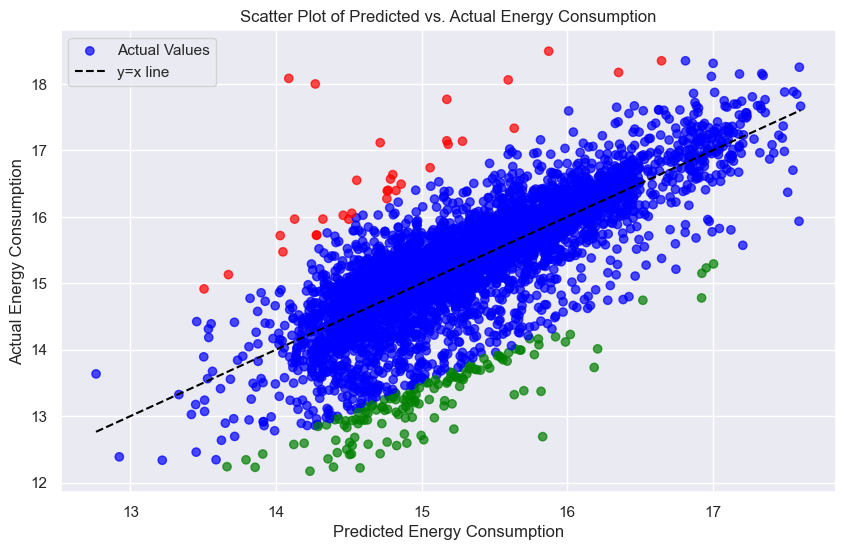

In [326]:


# Assuming you have the min_diff_row DataFrame from your grid search
# Replace 'your_predicted_values' with the actual variable containing your predicted values

# Extract the parameters from the row with minimum difference
params = min_diff_row['params']

# Use the XGBoost model with the chosen parameters
best_model = xgb.XGBRegressor(**params)

# Perform cross-validated predictions on the test set
y_cv_pred = cross_val_predict(best_model, X_train1, y_train, cv=5)



# Extract the actual target values for the test set
y_actual_test =y_train.values 

# Calculate the 20% threshold (adjust as needed)
threshold = 0.2 * y_cv_pred.max()

# Create an array to store the colors
colors = np.where(y_actual_test > 1.1 * y_cv_pred, 'red', np.where(y_actual_test < 0.9 * y_cv_pred, 'green', 'blue'))

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_cv_pred, y_actual_test, c=colors, alpha=0.7, label='Actual Values')
plt.plot([y_cv_pred.min(), y_cv_pred.max()], [y_cv_pred.min(), y_cv_pred.max()], '--', color='black', label='y=x line')
plt.title('Scatter Plot of Predicted vs. Actual Energy Consumption')
plt.xlabel('Predicted Energy Consumption')
plt.ylabel('Actual Energy Consumption')
plt.legend()
plt.show()


In [321]:
X_train1.head


<bound method NDFrame.head of       unitstotal  number of buildings  occupancy  unitsres  bldgdepth  \
0           27.0                  1.0      100.0      27.0      70.00   
1           56.0                  1.0      100.0      54.0     118.00   
2           70.0                  1.0      100.0      70.0      86.83   
3           46.0                  1.0      100.0      39.0     100.00   
4            6.0                  1.0      100.0       0.0      88.00   
...          ...                  ...        ...       ...        ...   
5854         1.0                  1.0      100.0       0.0     105.00   
5855       118.0                  1.0      100.0     117.0     140.00   
5856        53.0                  1.0      100.0      48.0      90.00   
5857        60.0                  1.0      100.0      60.0     170.00   
5858       138.0                  1.0      100.0     135.0     266.00   

      lotarea_log  bldgarea_log  numfloors_log  assessland_log  \
0        9.247251     10.36

In [286]:

# Calculate the vertical distance between each point and the y=x line
vertical_distances1 = y_actual_test - y_cv_pred
vertical_distances2 = y_cv_pred -y_actual_test

print(vertical_distances1[:5])



# Find the indices of the top 5 points above and below the predicted values
top_5_above_indices = np.argsort(vertical_distances2)[:5]
top_5_below_indices = np.argsort(vertical_distances1)[:5]


#top5_above_value=y_actual_test[top_5_above_indices]+vertical_distances2[top_5_above_indices]

print(y_actual_test[1])

# Print the indices and corresponding values for the top 5 above and below
print("Top 5 points above the predicted values:")
for i in top_5_above_indices:
    print(f"Index: {i}, Predicted: {y_cv_pred[i]}, Actual: {y_actual_test[i]}")
    #print(f"Index: {i},  Actual: {y_train[i]}")

    
print("\nTop 5 points below the predicted values:")
for i in top_5_below_indices:
    print(f"Index: {i}, Predicted: {y_cv_pred[i]}, Actual: {y_actual_test[i]}")


[ 0.18264103 -0.22193884  0.20268802  0.25151727  0.46497211]
15.025388959870726
Top 5 points above the predicted values:
Index: 53, Predicted: 14.087554931640625, Actual: 18.083802176589998
Index: 452, Predicted: 14.269471168518066, Actual: 17.999808311765353
Index: 1694, Predicted: 15.873054504394531, Actual: 18.493068717685084
Index: 4743, Predicted: 15.173344612121582, Actual: 17.768271037220902
Index: 2906, Predicted: 15.595076560974121, Actual: 18.060746749358348

Top 5 points below the predicted values:
Index: 4870, Predicted: 15.831719398498535, Actual: 12.690352014772609
Index: 2708, Predicted: 16.185775756835938, Actual: 13.731897944084766
Index: 500, Predicted: 15.820582389831543, Actual: 13.372666894887052
Index: 5699, Predicted: 15.221802711486816, Actual: 12.804280652454494
Index: 3298, Predicted: 15.014603614807129, Actual: 12.643793562933741


In [290]:
#print features that will help us to identify the address of the building
#which has  highest level of excess in energy consumption compared to preidcted

index_to_check = 53  # Replace with the index you're interested in

non_zero_values = X_train.loc[index_to_check][X_train.loc[index_to_check] != 0]

for column_name, value in non_zero_values.items():
    print(f"Column name: {column_name}, Value: {value}")
    

Column name: unitstotal, Value: 1.0
Column name: number of buildings, Value: 1.0
Column name: occupancy, Value: 100.0
Column name: bldgdepth, Value: 115.0
Column name: lotarea_log, Value: 10.849744770527753
Column name: bldgarea_log, Value: 10.505094936455558
Column name: numfloors_log, Value: 0.6931471805599453
Column name: assessland_log, Value: 12.941203545546573
Column name: largest property use type - gross floor area (ft²)_log, Value: 10.463131911491967
Column name: property gfa - self-reported (ft²)_log, Value: 10.463131911491967
Column name: comarea_log, Value: 10.505094936455558
Column name: builtfar_log, Value: 0.5364933705145685
Column name: commfar_log, Value: 0.6931471805599453
Column name: facilfar_log, Value: 1.2237754316221157
Column name: year built_2020, Value: 1.0
Column name: postal code_11691.0, Value: 1.0
Column name: primary property type - self selected_other - services, Value: 1.0
Column name: landuse_6.0, Value: 1.0
Column name: lottype_5.0, Value: 1.0


In [315]:
match_condition = (
    (df_a_m['unitstotal'] == 1.0) &
    (df_a_m['number of buildings'] == 1.0) &
    (df_a_m['occupancy'] == 100.0) &
    (df_a_m['bldgdepth'] == 115.0) &
    (df_a_m['postal code'] == "11691") 
)

matching_rows = df_a_m[match_condition]

# Display all columns of df_a_m
#pd.set_option('display.max_columns', None)  # This will display all columns
#print(df_a_m.columns.tolist())


# Get the unique addresses for all matching rows
unique_addresses = matching_rows['address'].unique()

# Assuming you have the address
desired_address = unique_addresses[0]  # Replace with the actual address

# Find the row that matches the desired address
matching_row = df_a_m[df_a_m['address'] == desired_address]
# Check if a match is found
if not matching_row.empty:
    # Access the value of 'site energy use (kbtu)' for the desired address
    energy_value_str = matching_row['site energy use (kbtu)'].iloc[0]

    # Convert the value to a numeric type (float)
    try:
        energy_value = float(energy_value_str)

        # Calculate the log value
        log_energy_value = np.log(energy_value)

        print(f"Log of Site Energy Use for {desired_address}: {log_energy_value}")
    except ValueError:
        print(f"Could not convert 'site energy use (kbtu)' value to a numeric type.")
else:
    print(f"No matching address found: {desired_address}")

Log of Site Energy Use for 1107 redfern avenue: 18.083802162584306


In [316]:
#print features that will help us to identify the address of the building
#which has second highest level of excess in energy consumption compared to preidcyed

index_to_check = 452 # Replace with the index you're interested in

non_zero_values = X_train.loc[index_to_check][X_train.loc[index_to_check] != 0]

for column_name, value in non_zero_values.items():
    print(f"Column name: {column_name}, Value: {value}")
    

Column name: number of buildings, Value: 1.0
Column name: occupancy, Value: 100.0
Column name: bldgdepth, Value: 200.0
Column name: lotarea_log, Value: 10.493050416839504
Column name: bldgarea_log, Value: 10.632894335716385
Column name: numfloors_log, Value: 0.6931471805599453
Column name: assessland_log, Value: 12.689889802183568
Column name: largest property use type - gross floor area (ft²)_log, Value: 10.491301994830229
Column name: property gfa - self-reported (ft²)_log, Value: 10.62135173563291
Column name: comarea_log, Value: 10.632894335716385
Column name: builtfar_log, Value: 0.7654678421395714
Column name: commfar_log, Value: 0.6931471805599453
Column name: facilfar_log, Value: 1.2237754316221157
Column name: year built_1960, Value: 1.0
Column name: postal code_11208.0, Value: 1.0
Column name: primary property type - self selected_manufacturing/industrial plant, Value: 1.0
Column name: landuse_6.0, Value: 1.0
Column name: lottype_5.0, Value: 1.0


In [320]:
match_condition = (
    (df_a_m['landuse'] == 6.0) &
    (df_a_m['lottype'] == 5.0) &
    (df_a_m['number of buildings'] == 1.0) &
    (df_a_m['occupancy'] == 100.0) &
    (df_a_m['bldgdepth'] == 200.0) &
    (df_a_m['postal code'] == "11208") 
)

matching_rows = df_a_m[match_condition]

# Display all columns of df_a_m
#pd.set_option('display.max_columns', None)  # This will display all columns
#print(df_a_m.columns.tolist())


# Get the unique addresses for all matching rows
unique_addresses = matching_rows['address'].unique()
print(unique_addresses)
# Assuming you have the address
desired_address = unique_addresses[0]  # Replace with the actual address

# Find the row that matches the desired address
matching_row = df_a_m[df_a_m['address'] == desired_address]
# Check if a match is found
if not matching_row.empty:
    # Access the value of 'site energy use (kbtu)' for the desired address
    energy_value_str = matching_row['site energy use (kbtu)'].iloc[0]

    # Convert the value to a numeric type (float)
    try:
        energy_value = float(energy_value_str)

        # Calculate the log value
        log_energy_value = np.log(energy_value)

        print(f"Log of Site Energy Use for {desired_address}: {log_energy_value}")
    except ValueError:
        print(f"Could not convert 'site energy use (kbtu)' value to a numeric type.")
else:
    print(f"No matching address found: {desired_address}")

['959 essex street' '1002 essex street' '587 atkins avenue']
Log of Site Energy Use for 959 essex street: 17.999808296532454


In [322]:
#print features that will help us to iidentify the address of the building
#which has lowest level of energy consumptiion 

index_to_check = 4870 # Replace with the index you're interested in

non_zero_values = X_train.loc[index_to_check][X_train.loc[index_to_check] != 0]

for column_name, value in non_zero_values.items():
    print(f"Column name: {column_name}, Value: {value}")
    

Column name: unitstotal, Value: 65.0
Column name: number of buildings, Value: 1.0
Column name: occupancy, Value: 100.0
Column name: unitsres, Value: 65.0
Column name: bldgdepth, Value: 10.0
Column name: lotarea_log, Value: 10.831034692665982
Column name: bldgarea_log, Value: 12.240478903153711
Column name: numfloors_log, Value: 1.9459101490553132
Column name: assessland_log, Value: 12.229549885708273
Column name: largest property use type - gross floor area (ft²)_log, Value: 11.547336553476635
Column name: property gfa - self-reported (ft²)_log, Value: 11.547336553476635
Column name: resarea_log, Value: 12.240478903153711
Column name: builtfar_log, Value: 1.6272778305624314
Column name: residfar_log, Value: 1.2325602611778486
Column name: facilfar_log, Value: 1.7578579175523736
Column name: year built_1980, Value: 1.0
Column name: postal code_11207.0, Value: 1.0
Column name: primary property type - self selected_multifamily housing, Value: 1.0
Column name: landuse_3.0, Value: 1.0
Colum

In [324]:
#locate the address of the building which has lowest level of energy consumptiion compared 
#to predicted using the above values
match_condition = (
    (df_a_m['unitstotal'] == 65.0) &
    (df_a_m['number of buildings'] == 1.0) &
    (df_a_m['occupancy'] == 100.0) &
    (df_a_m['bldgdepth'] == 10.0) &
    (df_a_m['postal code'] == "11207") 
)

matching_rows = df_a_m[match_condition]

# Display all columns of df_a_m
#pd.set_option('display.max_columns', None)  # This will display all columns
#print(df_a_m.columns.tolist())


# Get the unique addresses for all matching rows
unique_addresses = matching_rows['address'].unique()
print(unique_addresses)

# Assuming you have the address
desired_address = unique_addresses[0]  # Replace with the actual address

# Find the row that matches the desired address
matching_row = df_a_m[df_a_m['address'] == desired_address]
# Check if a match is found
if not matching_row.empty:
    # Access the value of 'site energy use (kbtu)' for the desired address
    energy_value_str = matching_row['site energy use (kbtu)'].iloc[0]

    # Convert the value to a numeric type (float)
    try:
        energy_value = float(energy_value_str)

        # Calculate the log value
        log_energy_value = np.log(energy_value)

        print(f"Log of Site Energy Use for {desired_address}: {log_energy_value}")
    except ValueError:
        print(f"Could not convert 'site energy use (kbtu)' value to a numeric type.")
else:
    print(f"No matching address found: {desired_address}")

['311 georgia avenue']
Log of Site Energy Use for 311 georgia avenue: 12.690348934062628
